In [92]:
!pip install pandas matplotlib seaborn

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, StandardScaler
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression


In [94]:
# Load your data into a DataFrame
df = pd.read_csv(r'C:\Users\LENOVO\OneDrive\Documents\Courses\DIGICROME\NextHikesINTERNSHIP\Project 4\MOBILECSVFILE.csv')

# Data Exploration

In [96]:
# 1. Basic Data Overview
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)

Dataset Shape: (541, 12)

Column Names: ['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize']

Data Types:
 Unnamed: 0         int64
Model             object
Colour            object
Memory             int64
RAM                int64
Battery_           int64
Rear Camera       object
Front Camera      object
AI Lens            int64
Mobile Height    float64
Processor_        object
Prize             object
dtype: object


In [97]:
# 2. Quick Look at the Data
print("\nFirst 5 Rows:\n", df.head())


First 5 Rows:
    Unnamed: 0            Model        Colour  Memory  RAM  Battery_  \
0           0  Infinix SMART 7   Night Black      64    4      6000   
1           1  Infinix SMART 7    Azure Blue      64    4      6000   
2           2     MOTOROLA G32  Mineral Gray     128    8      5000   
3           3         POCO C50    Royal Blue      32    2      5000   
4           4  Infinix HOT 30i      Marigold     128    8      5000   

  Rear Camera Front Camera  AI Lens  Mobile Height  \
0        13MP          5MP        1          16.76   
1        13MP          5MP        1          16.76   
2        50MP         16MP        0          16.64   
3         8MP          5MP        0          16.56   
4        50MP          5MP        1          16.76   

                   Processor_   Prize  
0  Unisoc Spreadtrum SC9863A1   7,299  
1  Unisoc Spreadtrum SC9863A1   7,299  
2     Qualcomm Snapdragon 680  11,999  
3          Mediatek Helio A22   5,649  
4                         G37   

In [98]:
# 2.1 Quick Look at the Data
print("\nFirst 5 Rows:\n", df.tail())


First 5 Rows:
      Unnamed: 0                  Model          Colour  Memory  RAM  Battery_  \
536         637  SAMSUNG Galaxy S23 5G           Cream     256    8      3900   
537         638               LAVA Z21            Cyan      32    2      3100   
538         639         Tecno Spark 8T  Turquoise Cyan      64    4      5000   
539         641  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8      5000   
540         642               OPPO A77        Sky Blue     128    4      5000   

    Rear Camera Front Camera  AI Lens  Mobile Height  \
536        50MP         12MP        0          15.49   
537         5MP          2MP        0          12.70   
538        50MP          8MP        0          16.76   
539        50MP         32MP        0          16.26   
540        50MP          8MP        0          16.66   

                      Processor_   Prize  
536  Qualcomm Snapdragon 8 Gen 2  79,999  
537                    Octa Core   5,998  
538           MediaTek Helio G3

In [99]:
print("\nInformation about the DataFrame:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB

Information about the DataFrame:
 None


In [100]:
# 3. Summary Statistics
print("\nSummary Statistics:\n", df.describe(include='all'))


Summary Statistics:
         Unnamed: 0     Model  Colour      Memory         RAM     Battery_  \
count   541.000000       541     541  541.000000  541.000000   541.000000   
unique         NaN       187     275         NaN         NaN          NaN   
top            NaN  vivo Y16  Yellow         NaN         NaN          NaN   
freq           NaN         9      12         NaN         NaN          NaN   
mean    289.711645       NaN     NaN  110.550832    5.397412  4871.587800   
std     182.359185       NaN     NaN   60.600694    1.984923   780.148862   
min       0.000000       NaN     NaN   16.000000    2.000000   800.000000   
25%     135.000000       NaN     NaN   64.000000    4.000000  5000.000000   
50%     273.000000       NaN     NaN  128.000000    6.000000  5000.000000   
75%     434.000000       NaN     NaN  128.000000    8.000000  5000.000000   
max     642.000000       NaN     NaN  256.000000    8.000000  7000.000000   

       Rear Camera Front Camera     AI Lens  Mobile H

In [101]:
# Checking for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [102]:
# 4. Check for Missing Values

# Checking for missing values
missing_values = df.isnull().sum()
print("\n Missing values per column:")
print(missing_values)

#print("\nMissing Values:\n", df.isnull().sum())


 Missing values per column:
Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64


In [103]:
# 5. Value Counts for Categorical Columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\nValue Counts for {col}:\n", df[col].value_counts())


Value Counts for Model:
 Model
vivo Y16                 9
realme C55               9
SAMSUNG Galaxy A14 5G    9
REDMI Note 12 Pro 5G     9
vivo T1 44W              8
                        ..
vivo Y1s                 1
OnePlus Nord             1
Micromax 3               1
vivo Y33s                1
OPPO A77                 1
Name: count, Length: 187, dtype: int64

Value Counts for Colour:
 Colour
Yellow            12
Royal Blue         8
Power Black        8
Black              8
Midnight Black     7
                  ..
Polar Blue         1
Cosmic grey        1
Sea                1
Infinity Black     1
Sky Blue           1
Name: count, Length: 275, dtype: int64

Value Counts for Rear Camera:
 Rear Camera
50MP     260
13MP      63
64MP      62
8MP       52
48MP      31
108MP     31
0MP       10
12MP      10
200MP      8
2MP        6
5MP        3
40MP       2
32MP       2
16MP       1
Name: count, dtype: int64

Value Counts for Front Camera:
 Front Camera
16MP    164
5MP     135
8MP   

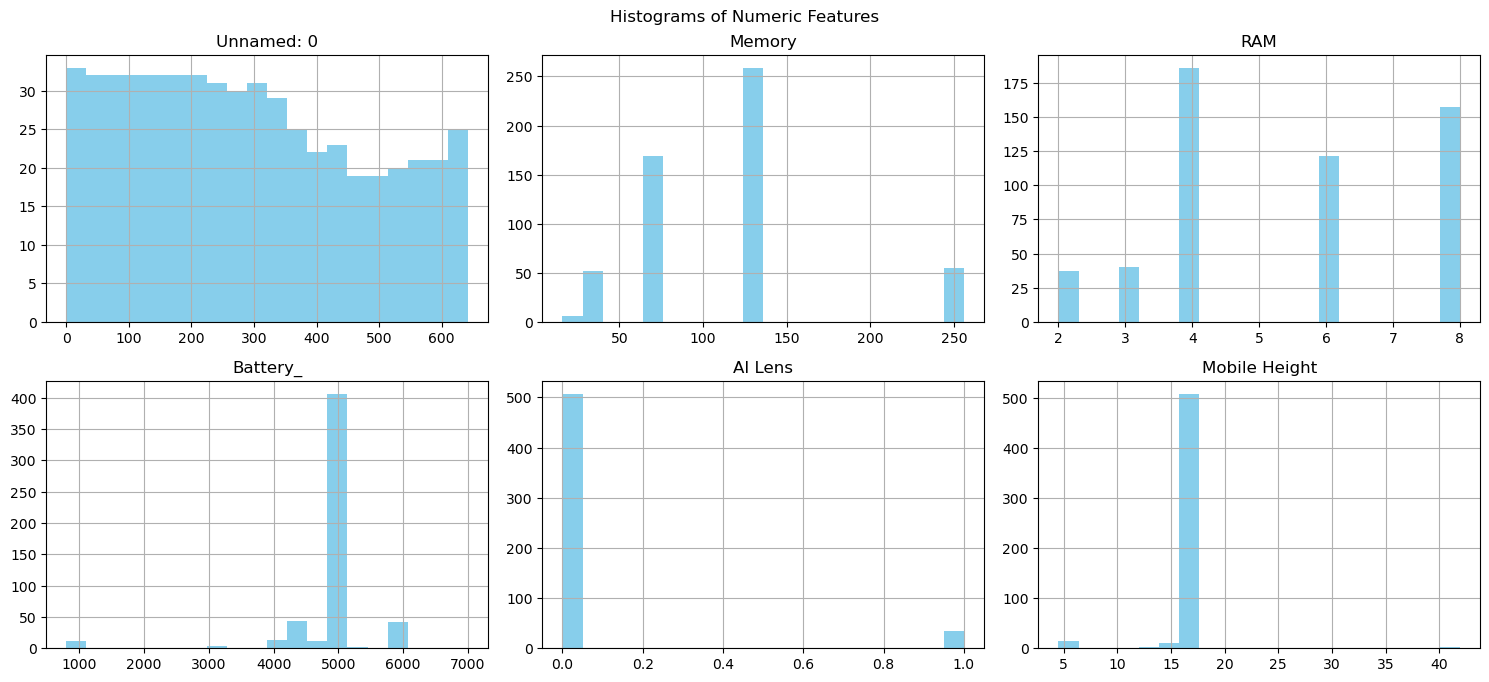

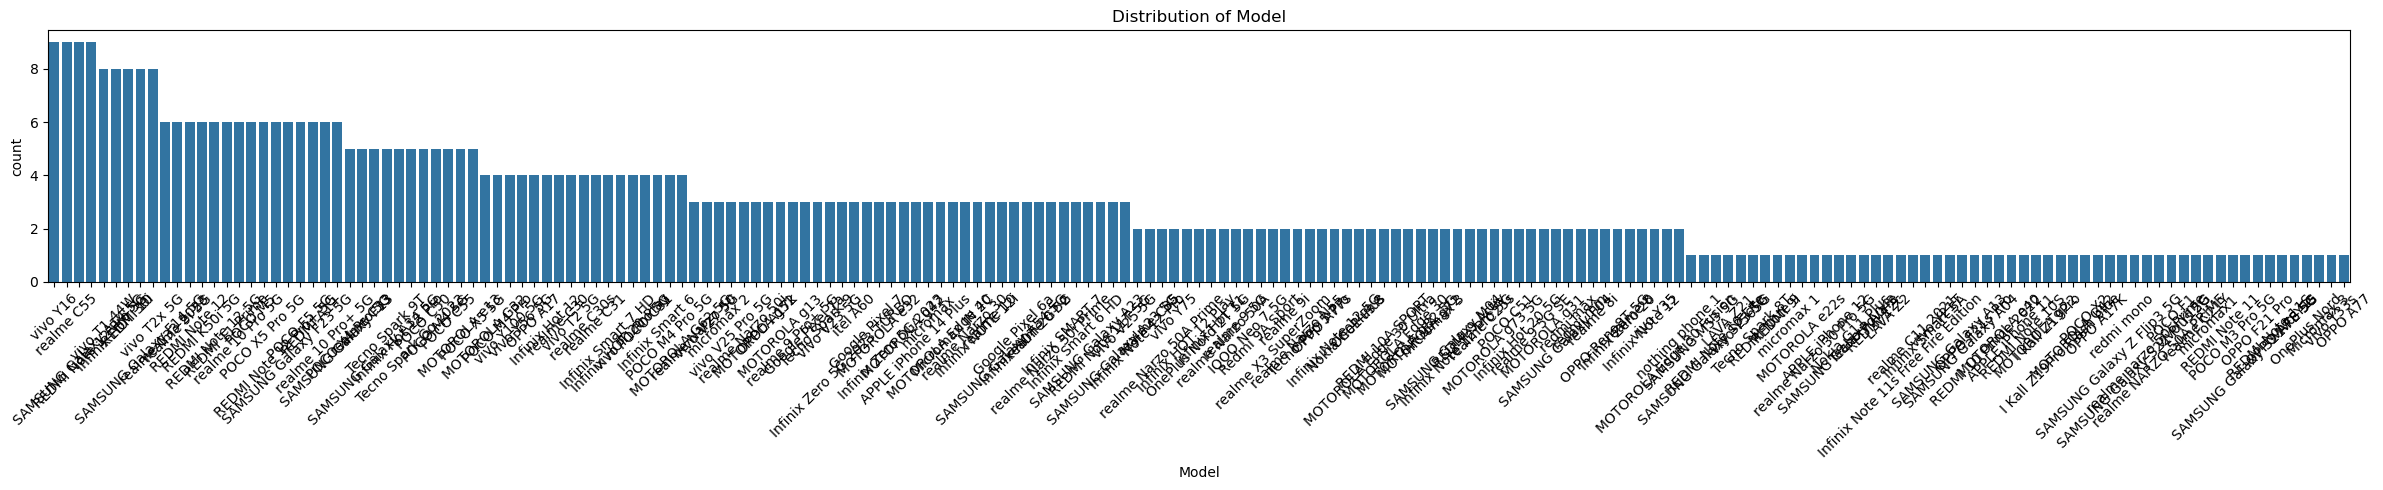

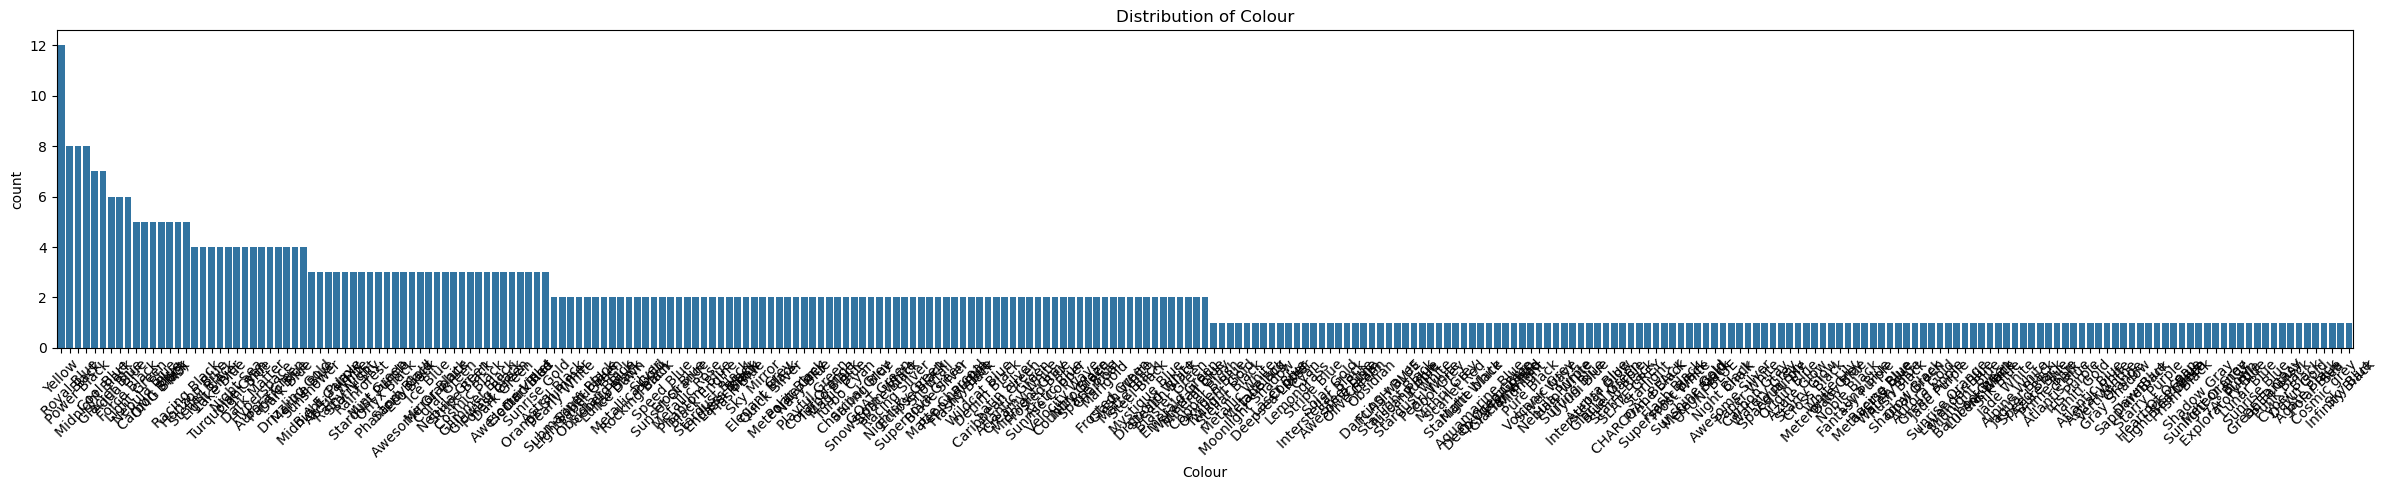

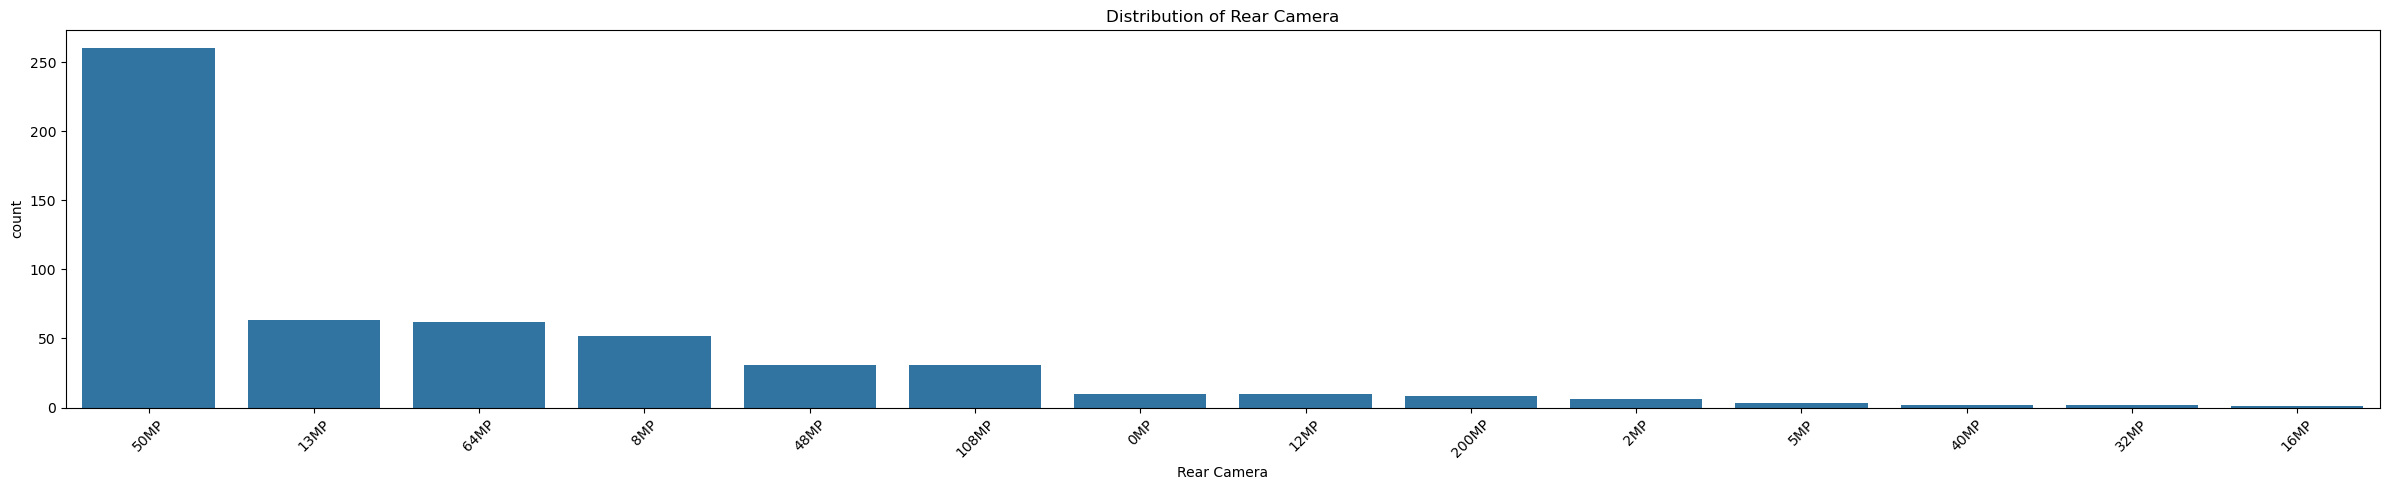

In [104]:
# 6. Histograms for Numeric Features
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(bins=20, figsize=(15, 10), color='skyblue', layout=(3, 3))
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()

# Bar plots for categorical features (top 3 by unique count)
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols[:3]:
    plt.figure(figsize=(24, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


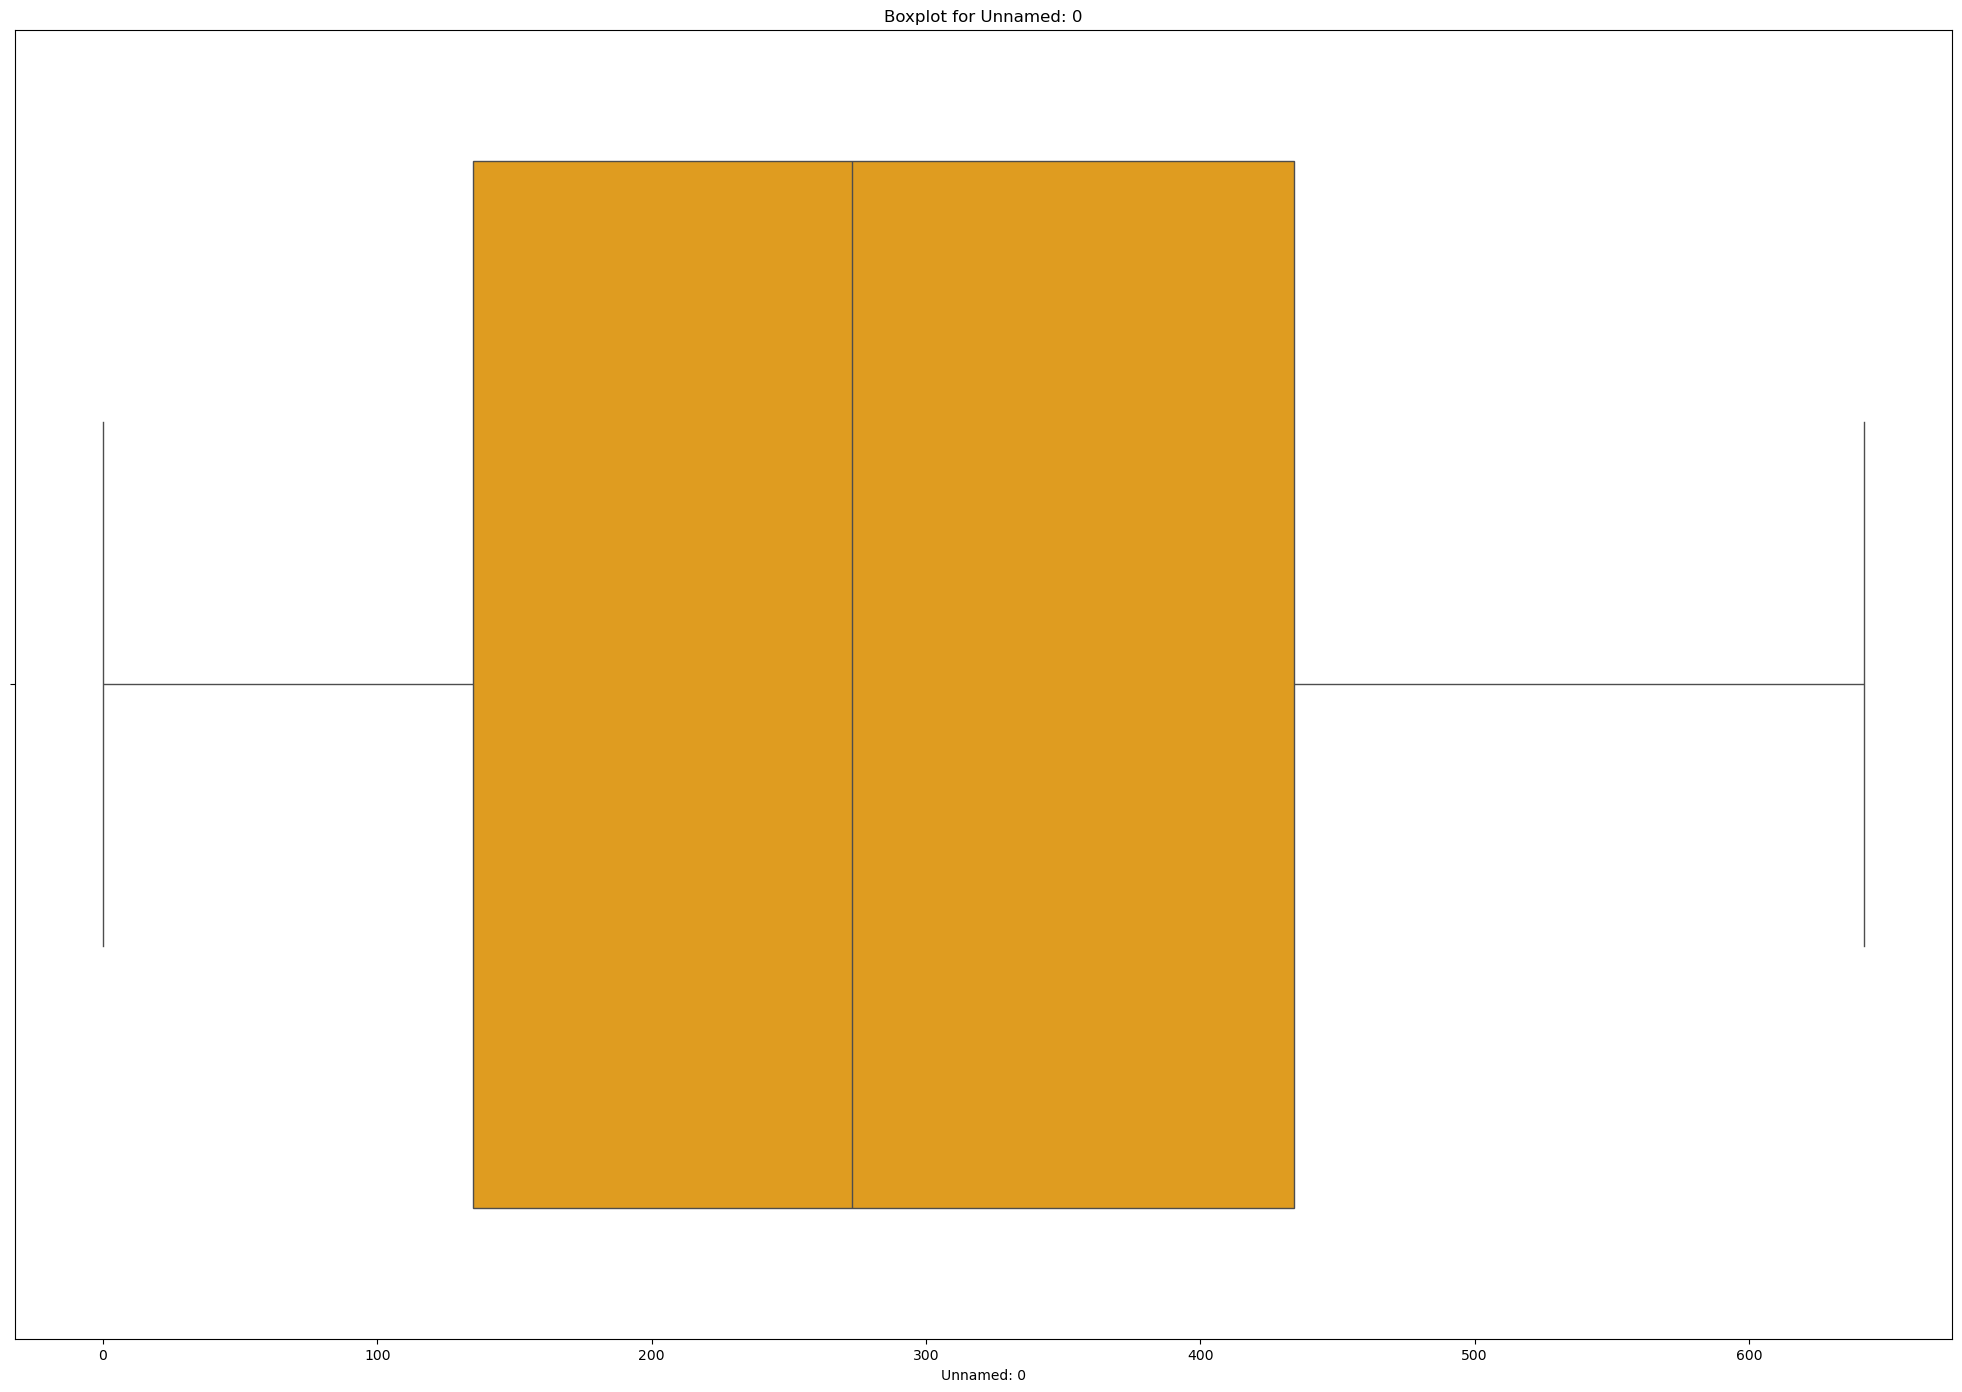

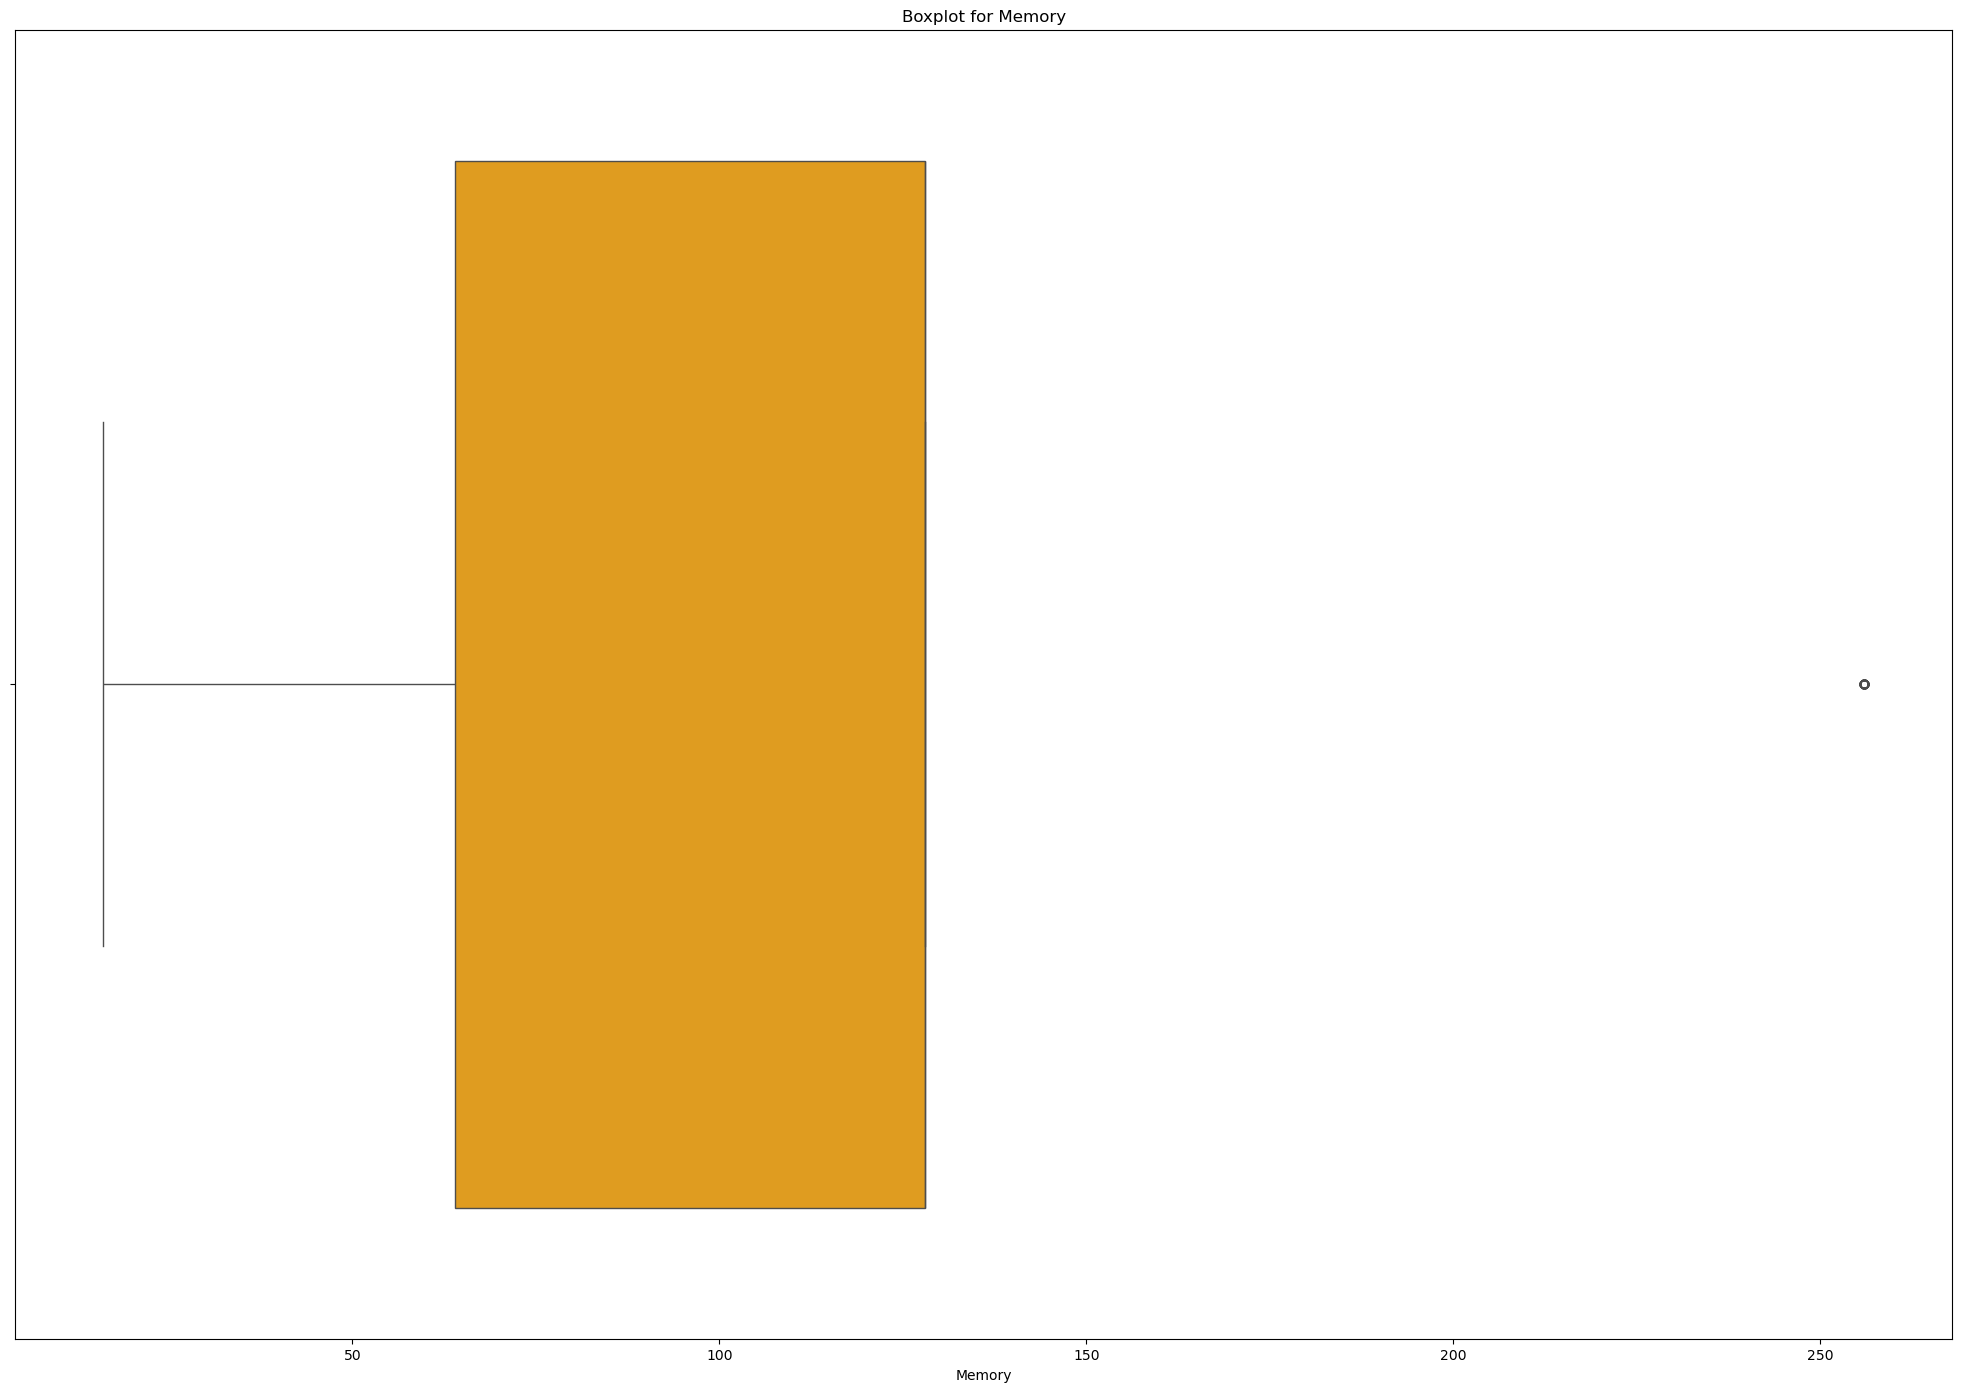

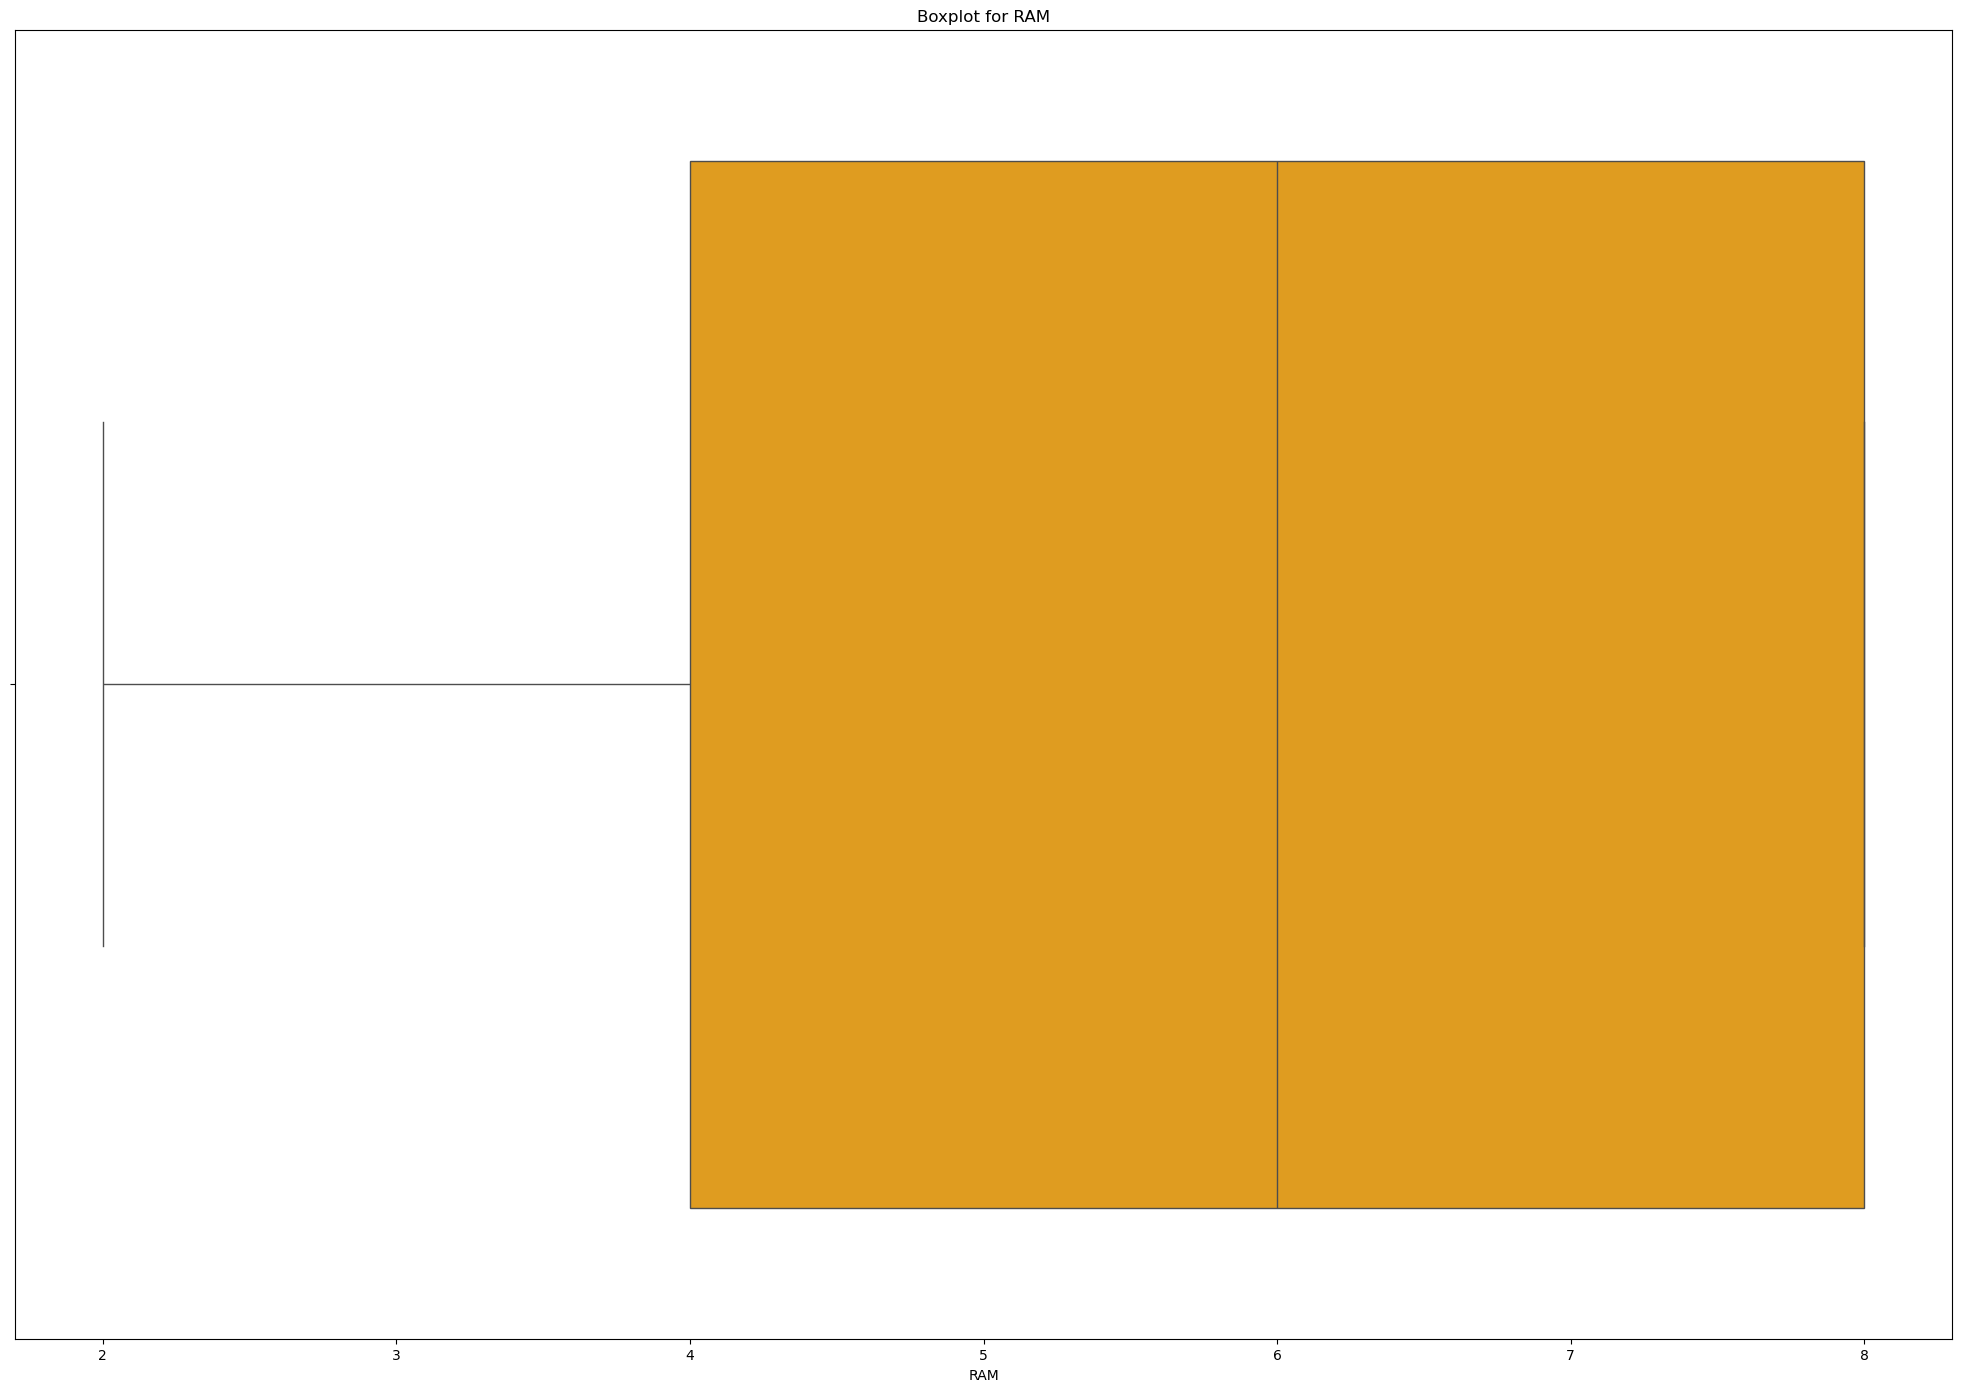

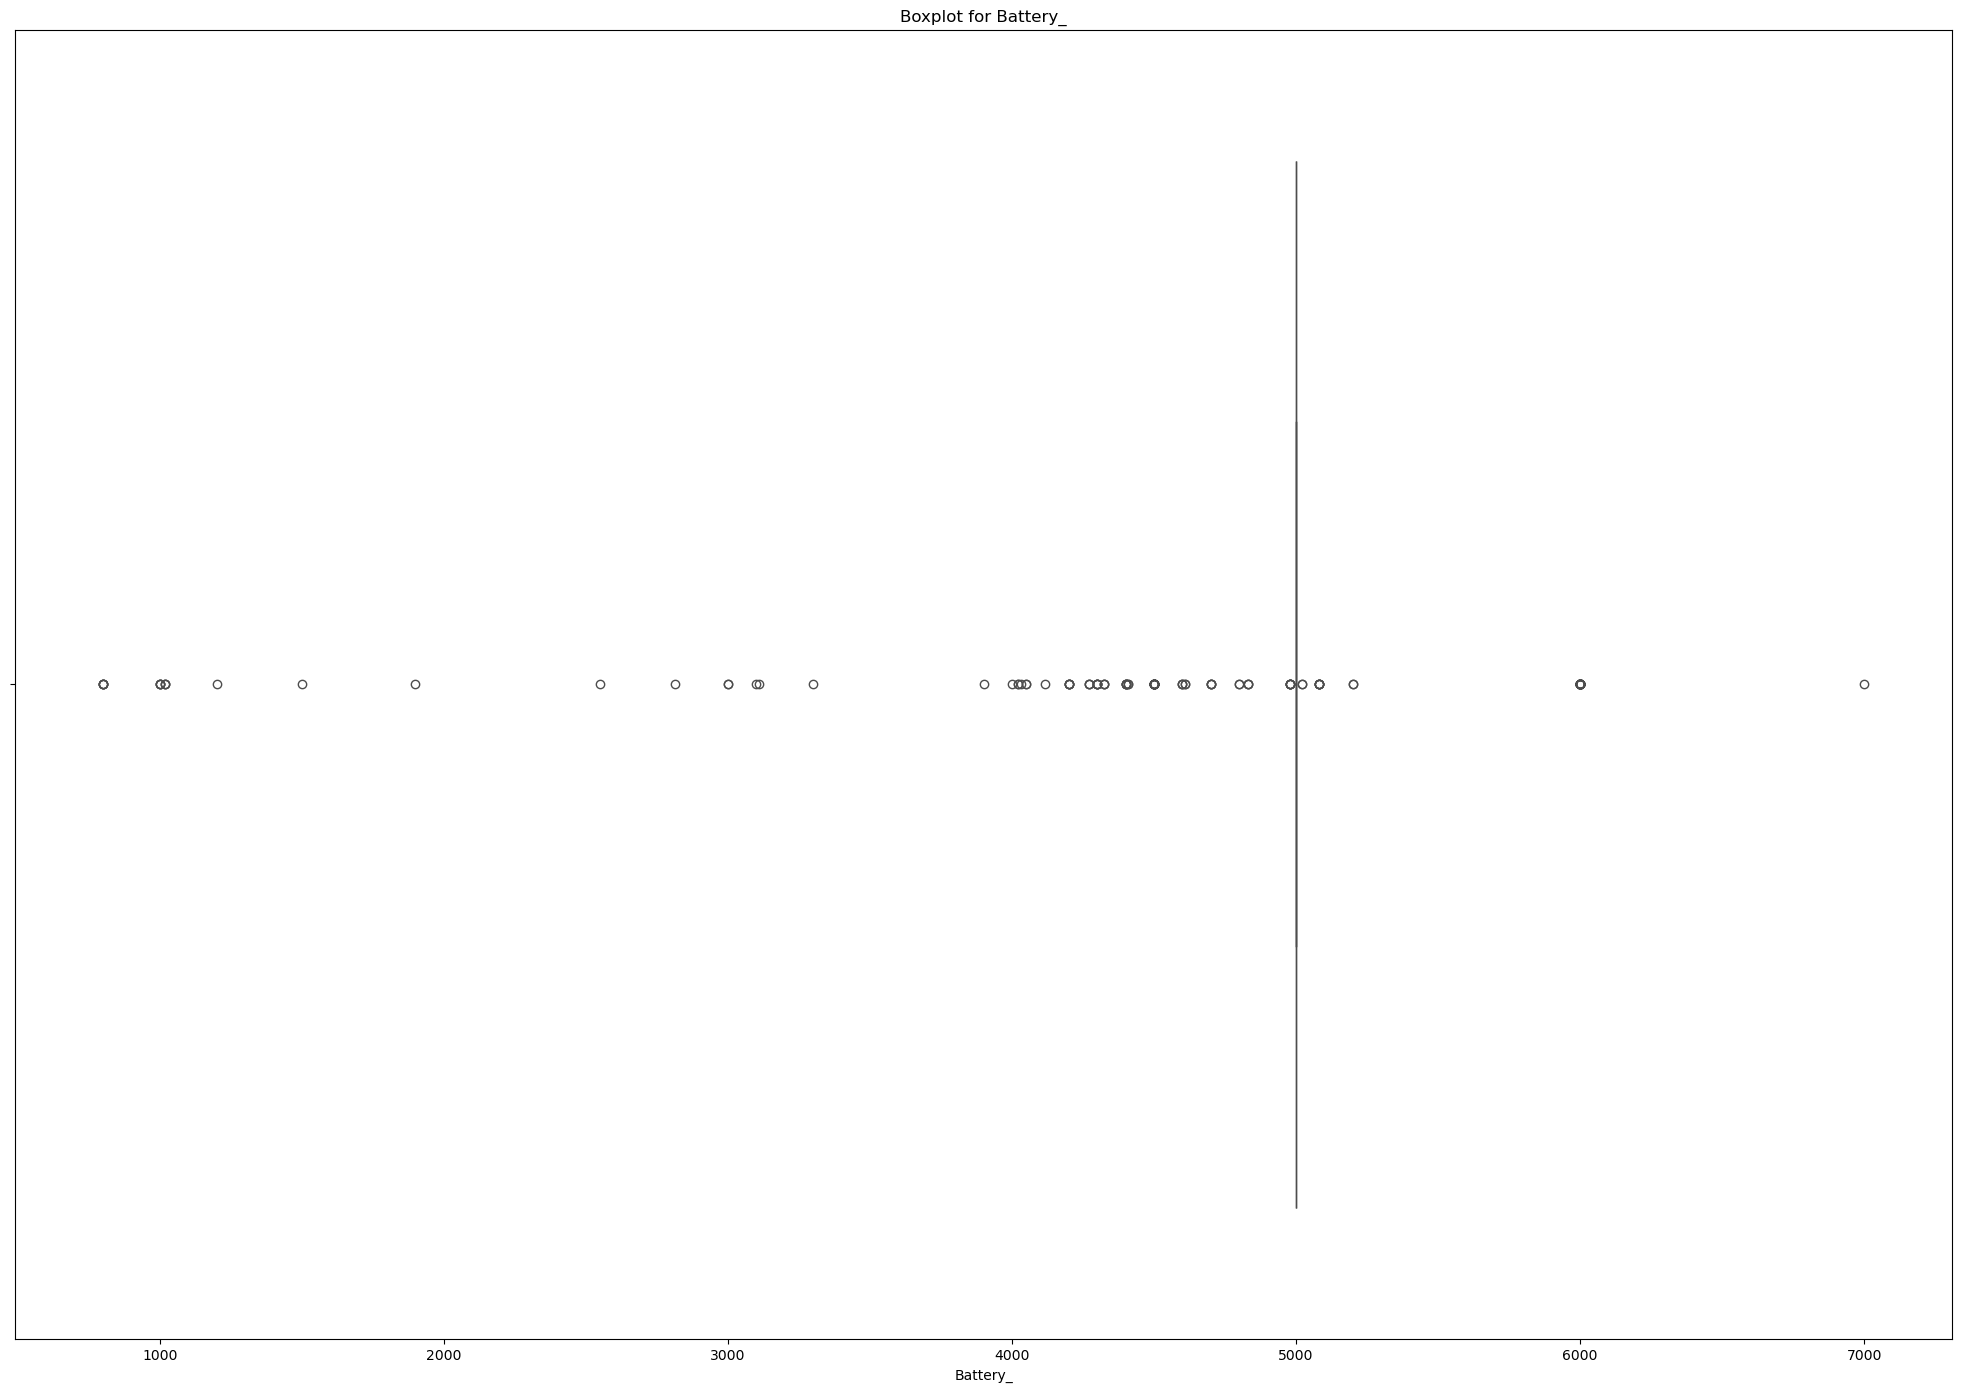

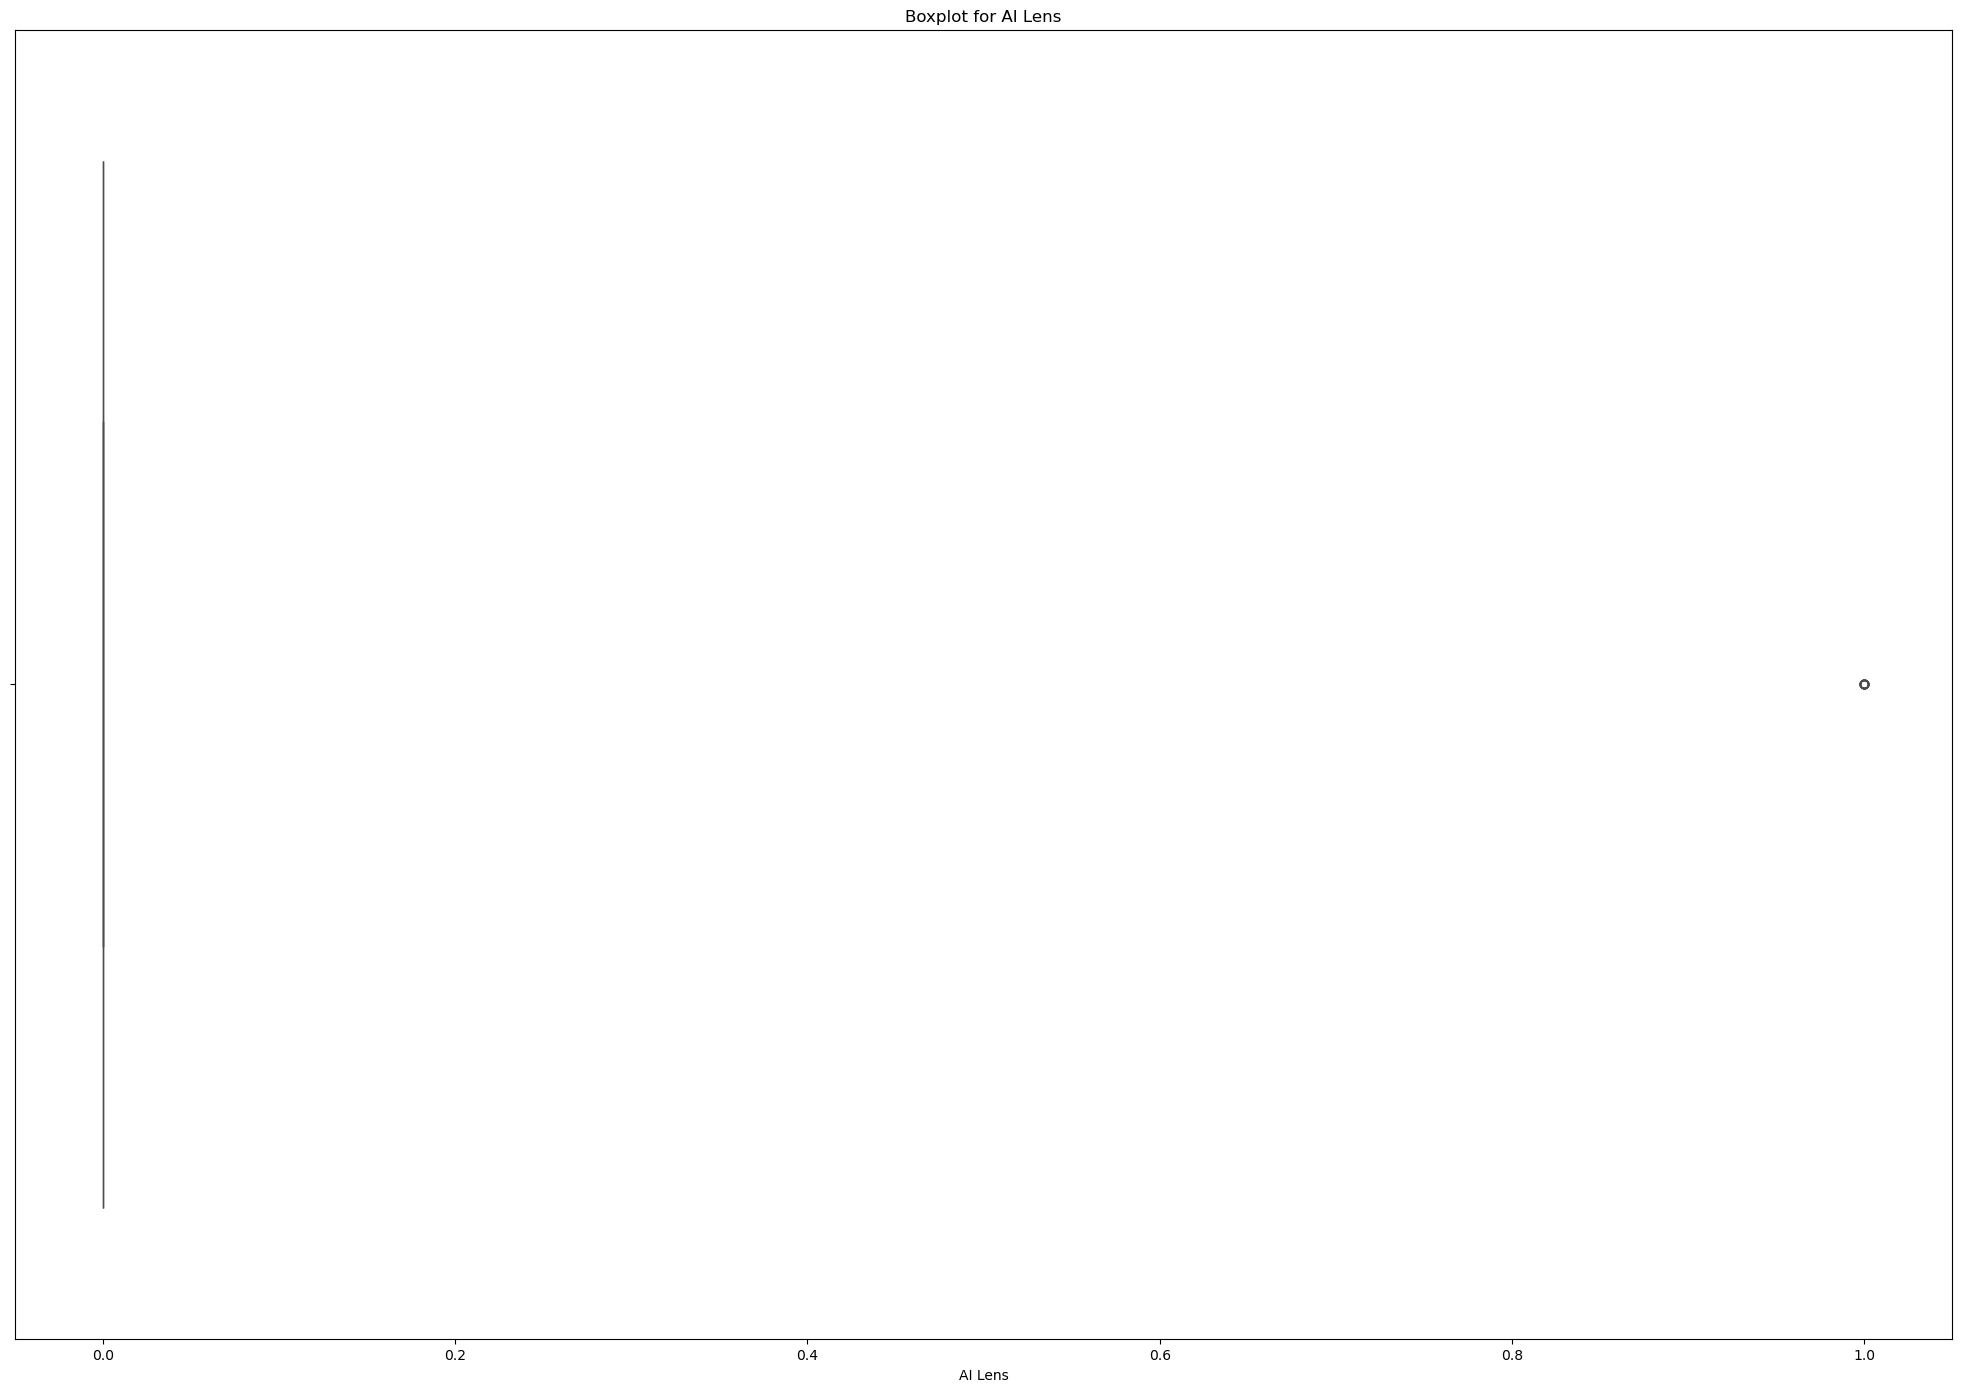

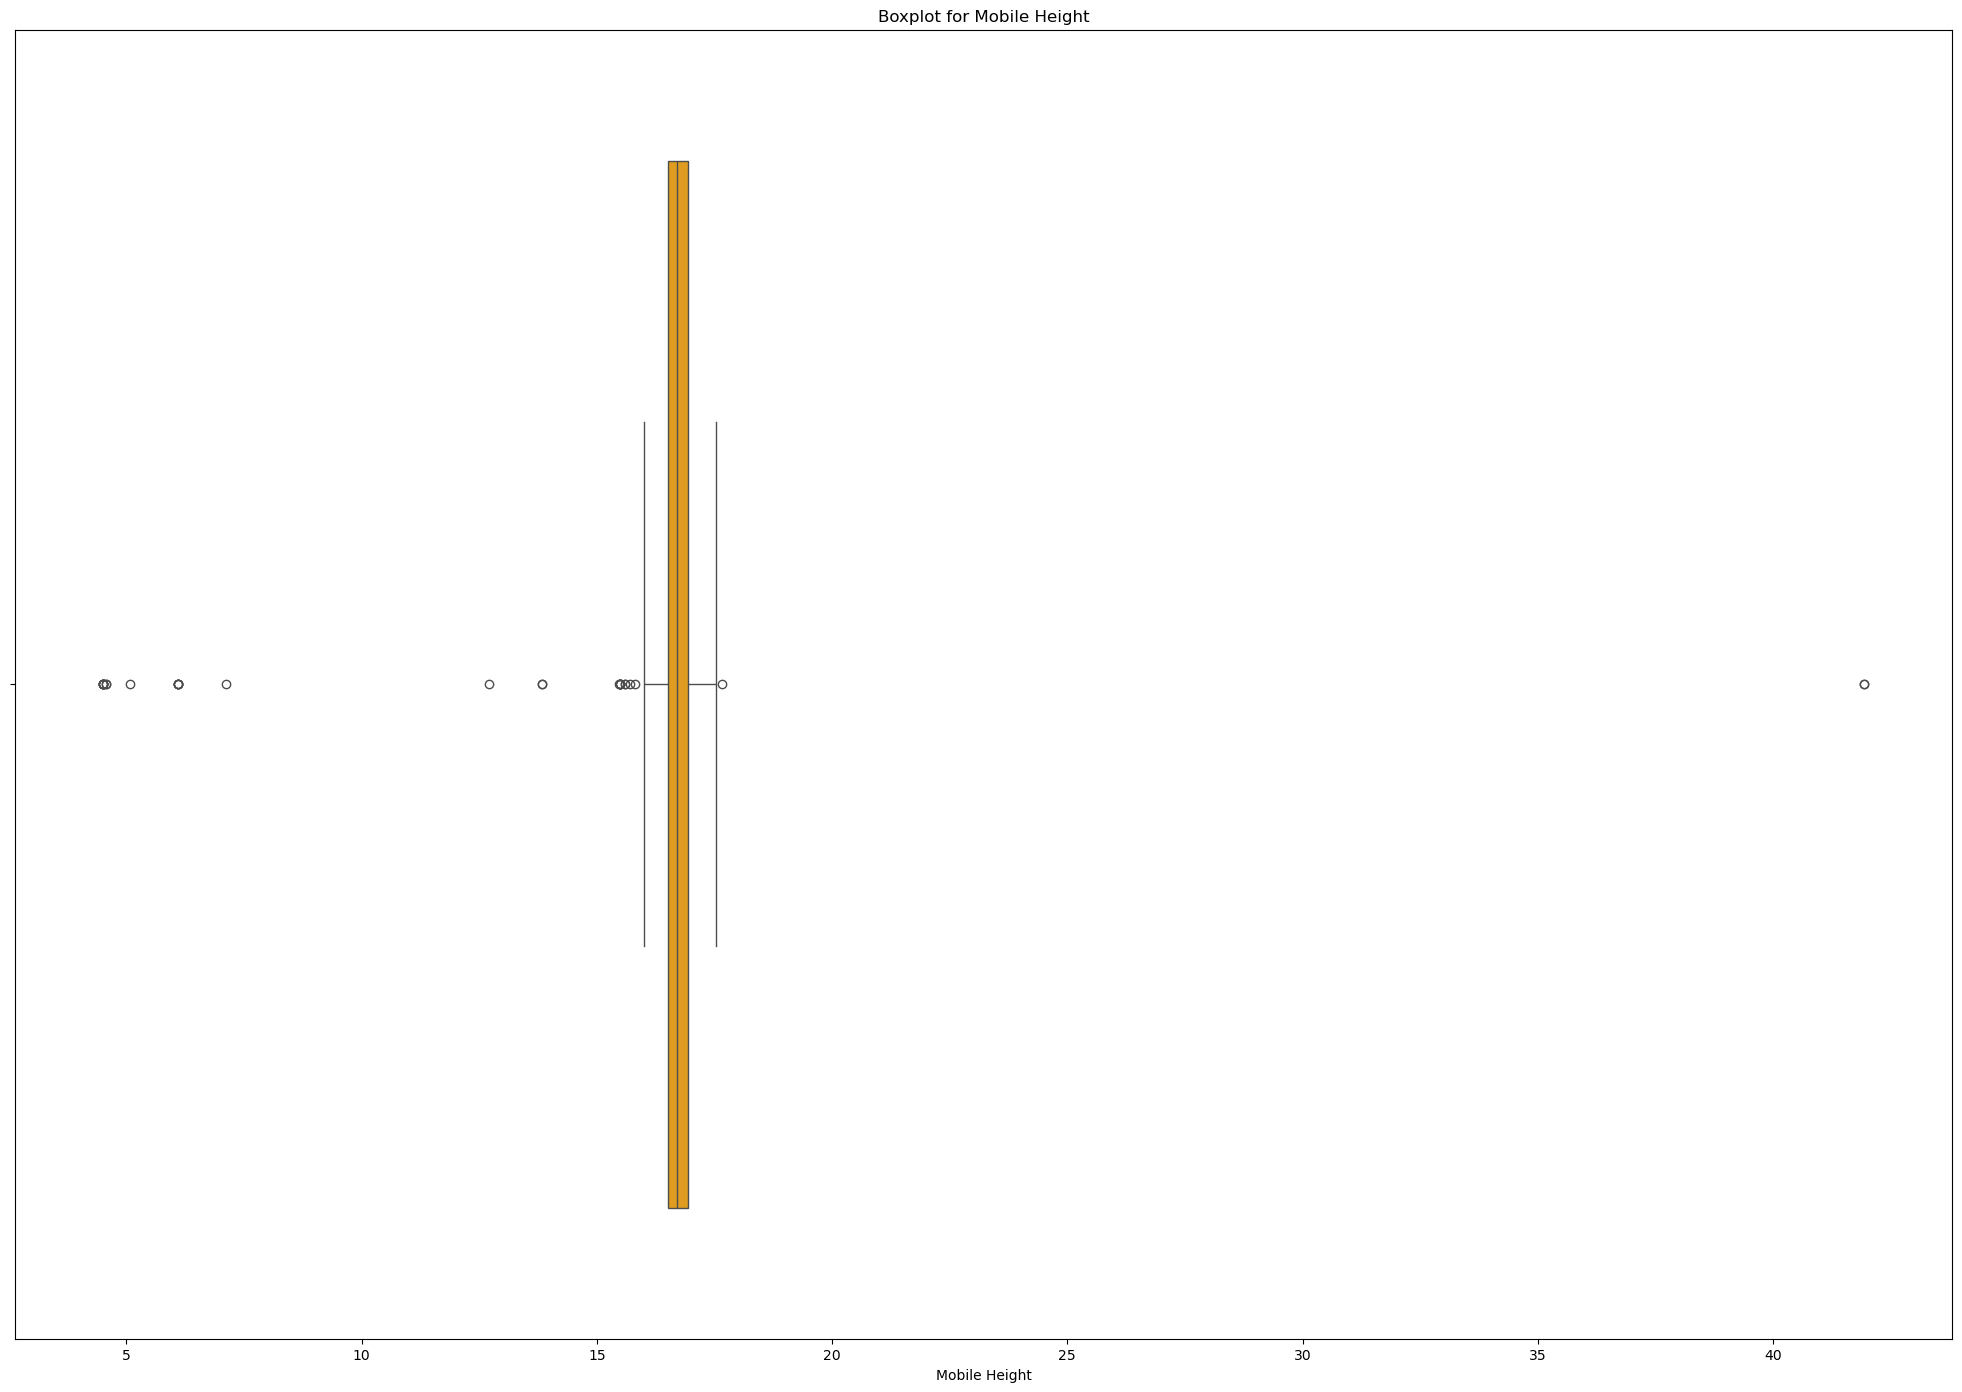

In [105]:
# 7. Boxplots to Spot Outliers
for col in numeric_cols:
    plt.figure(figsize=(25, 17))
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot for {col}')
    plt.show()

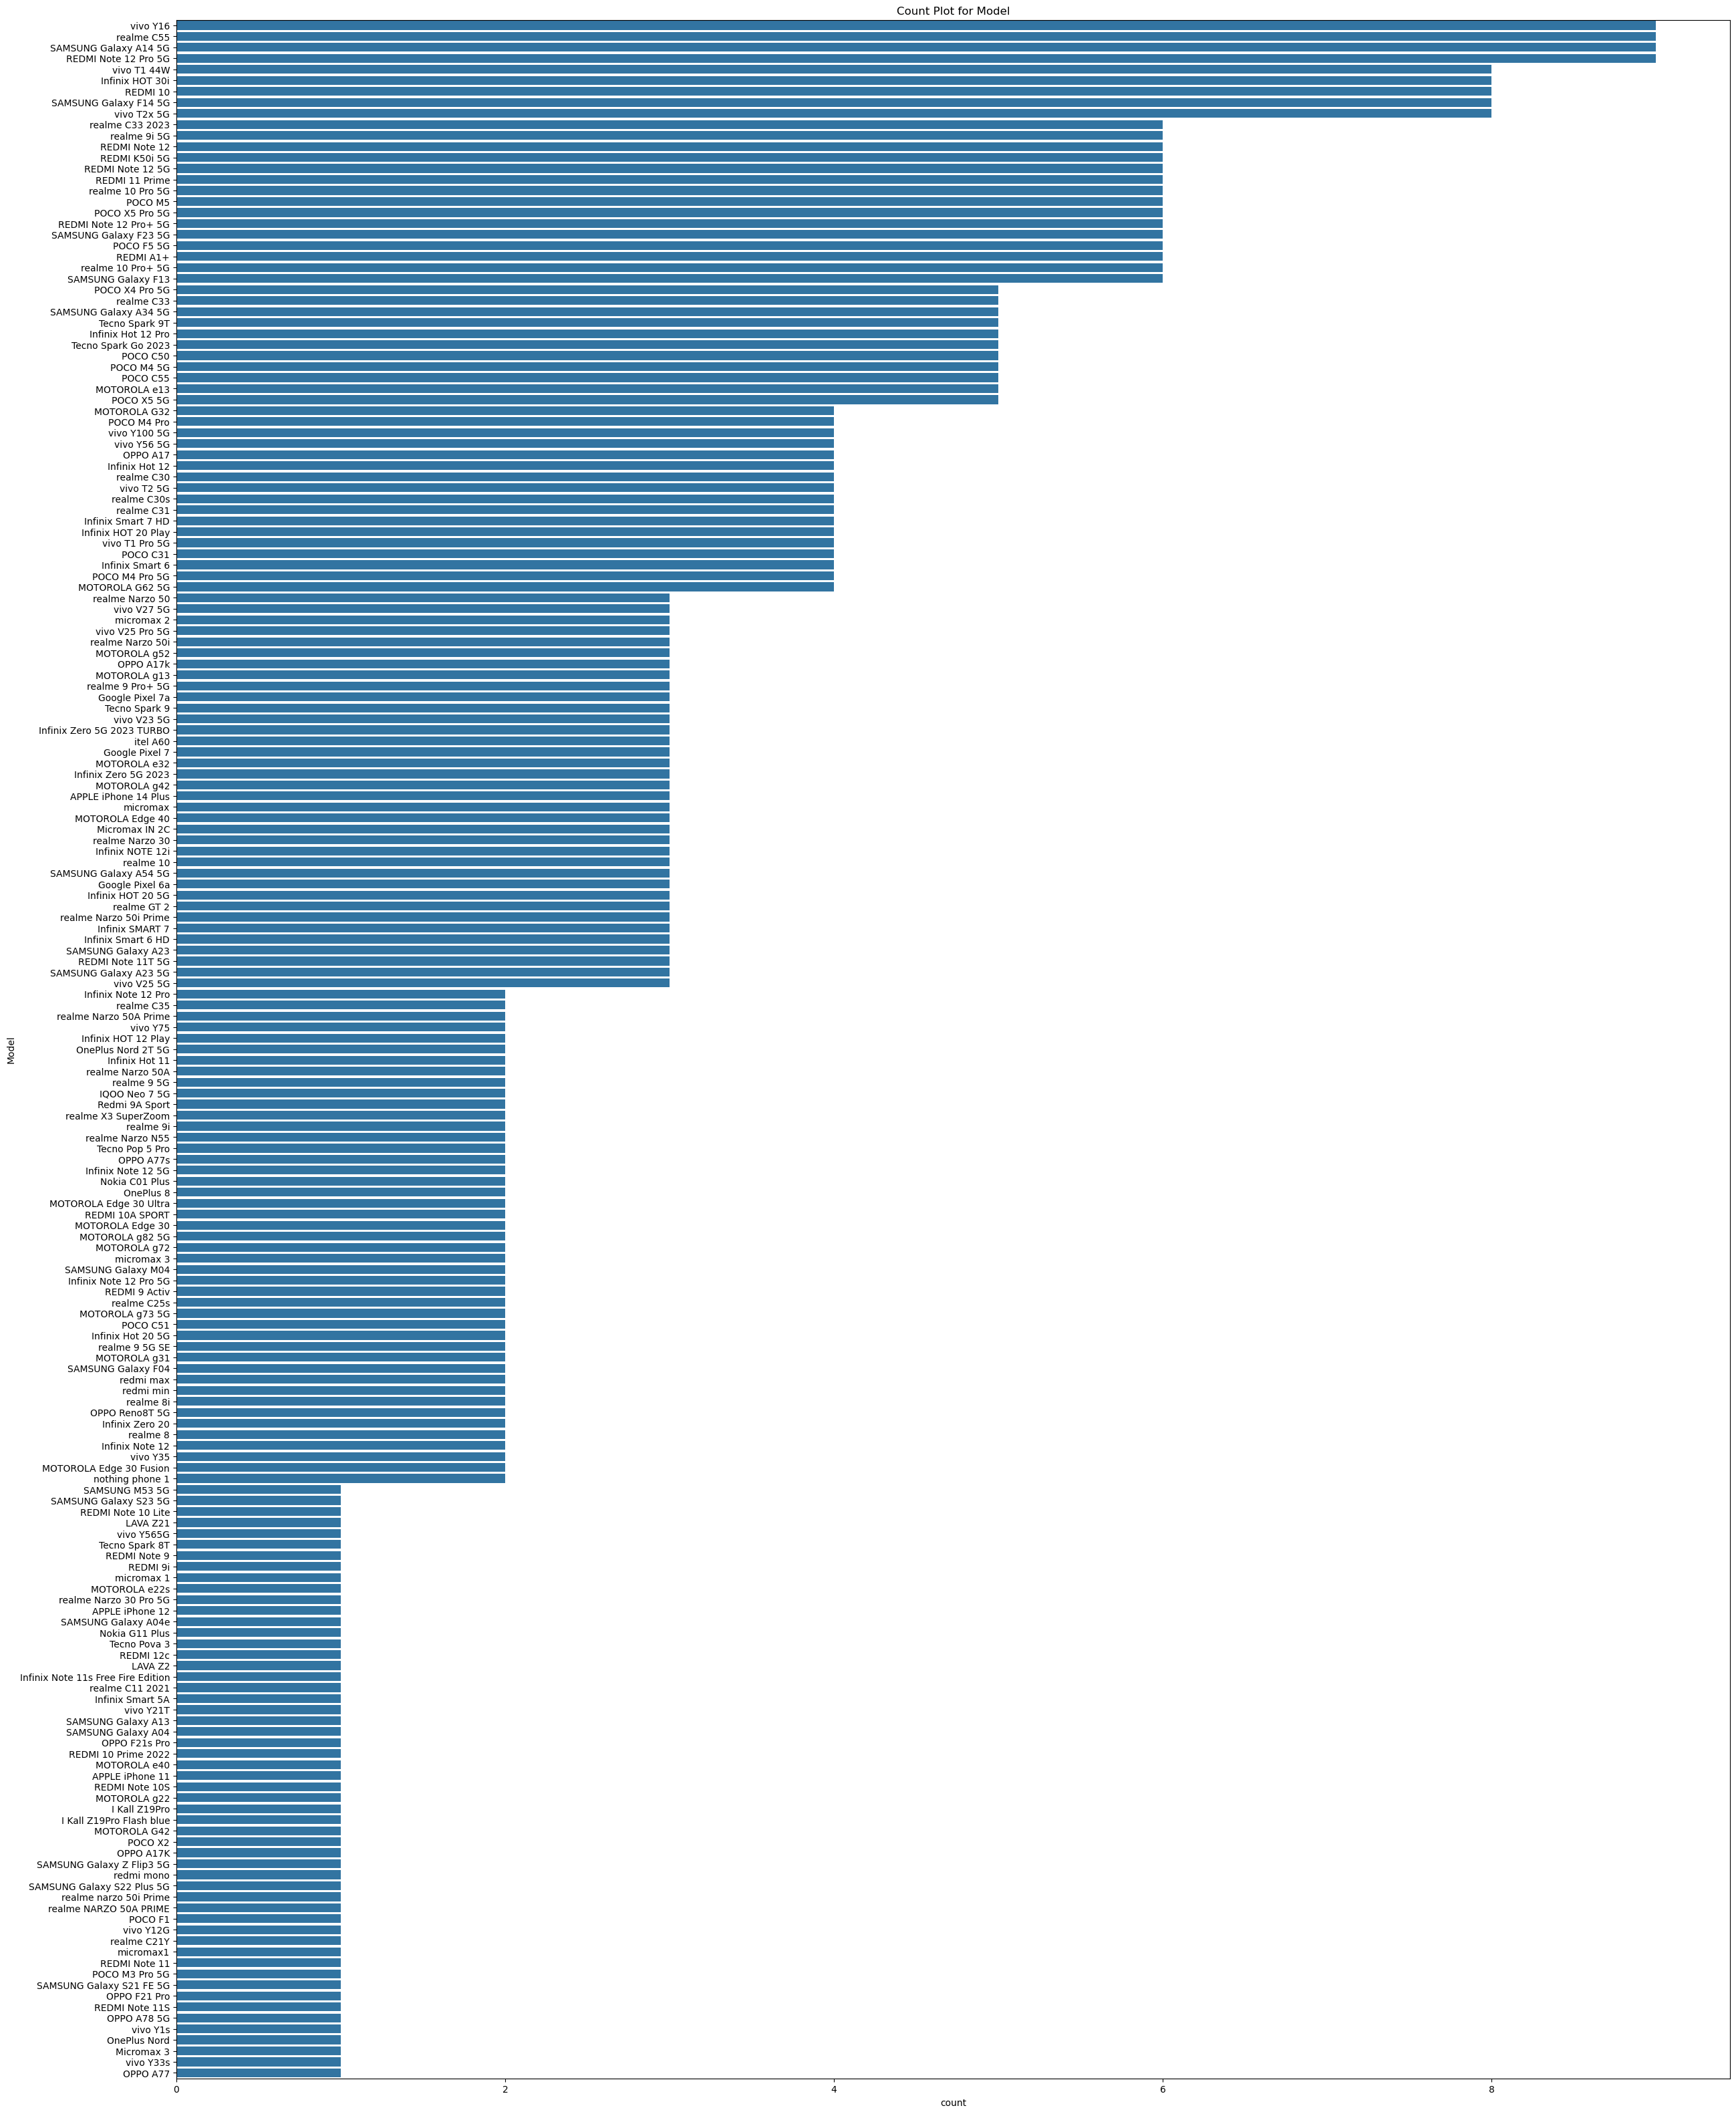

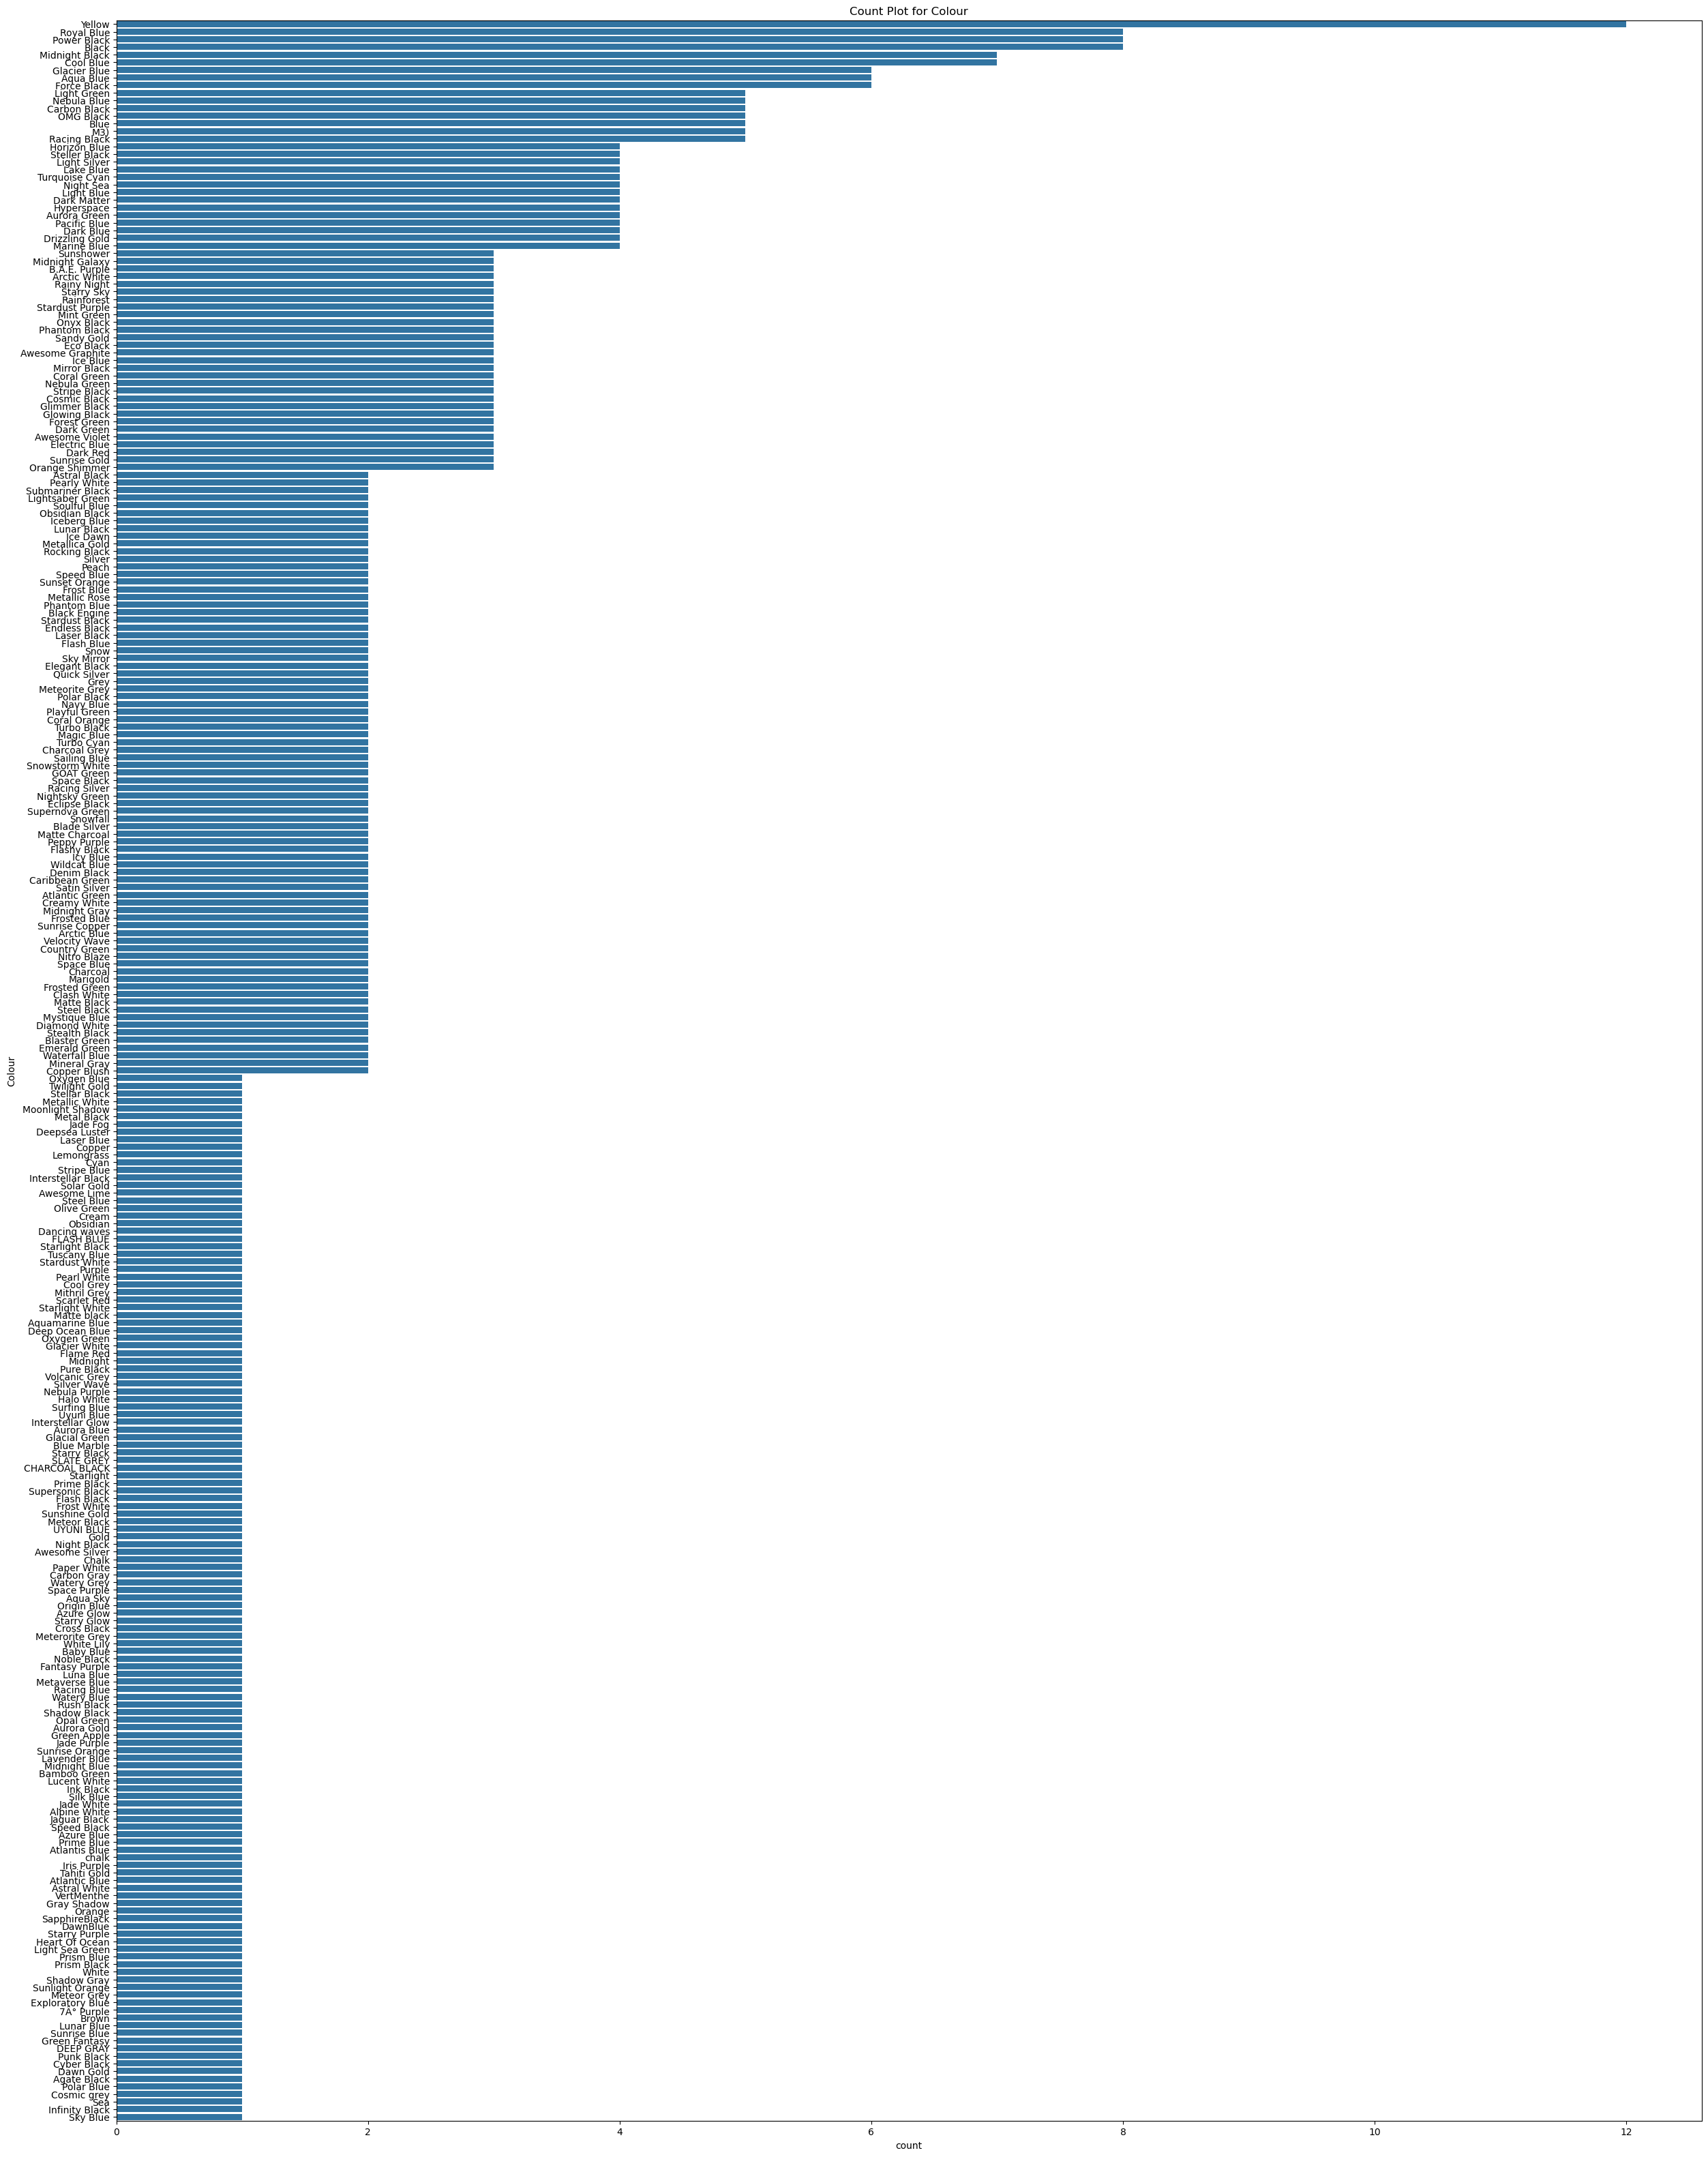

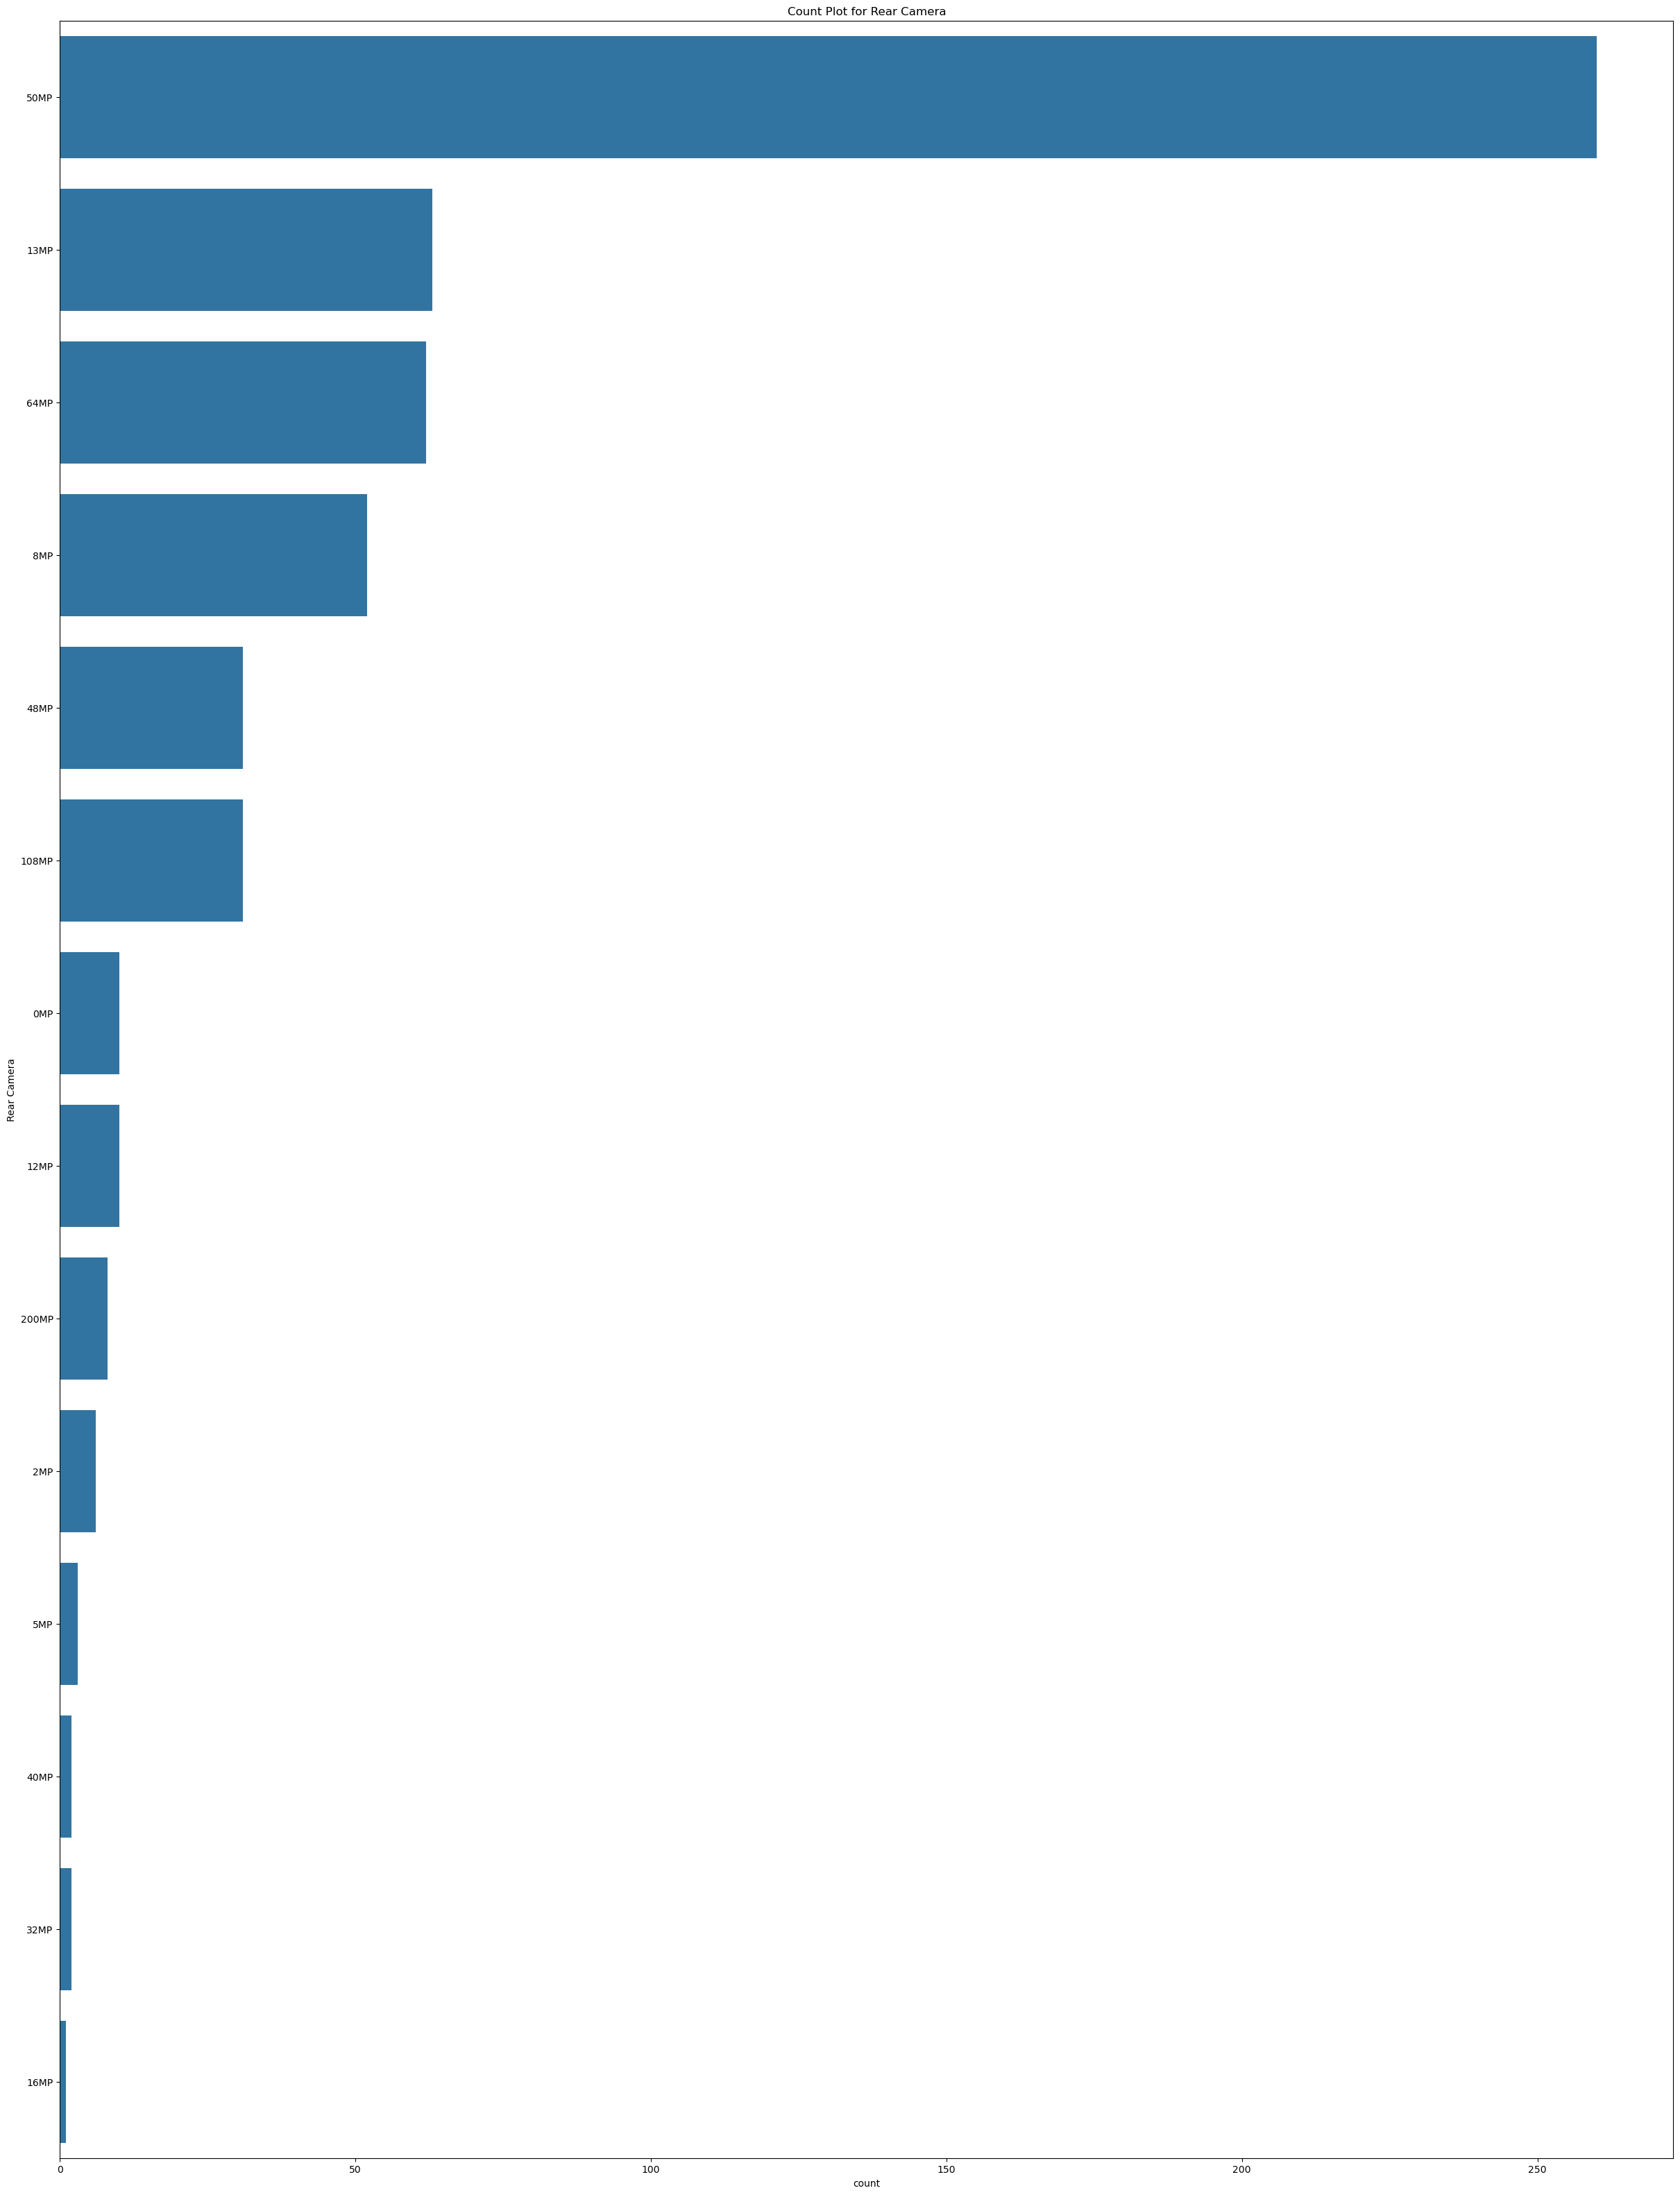

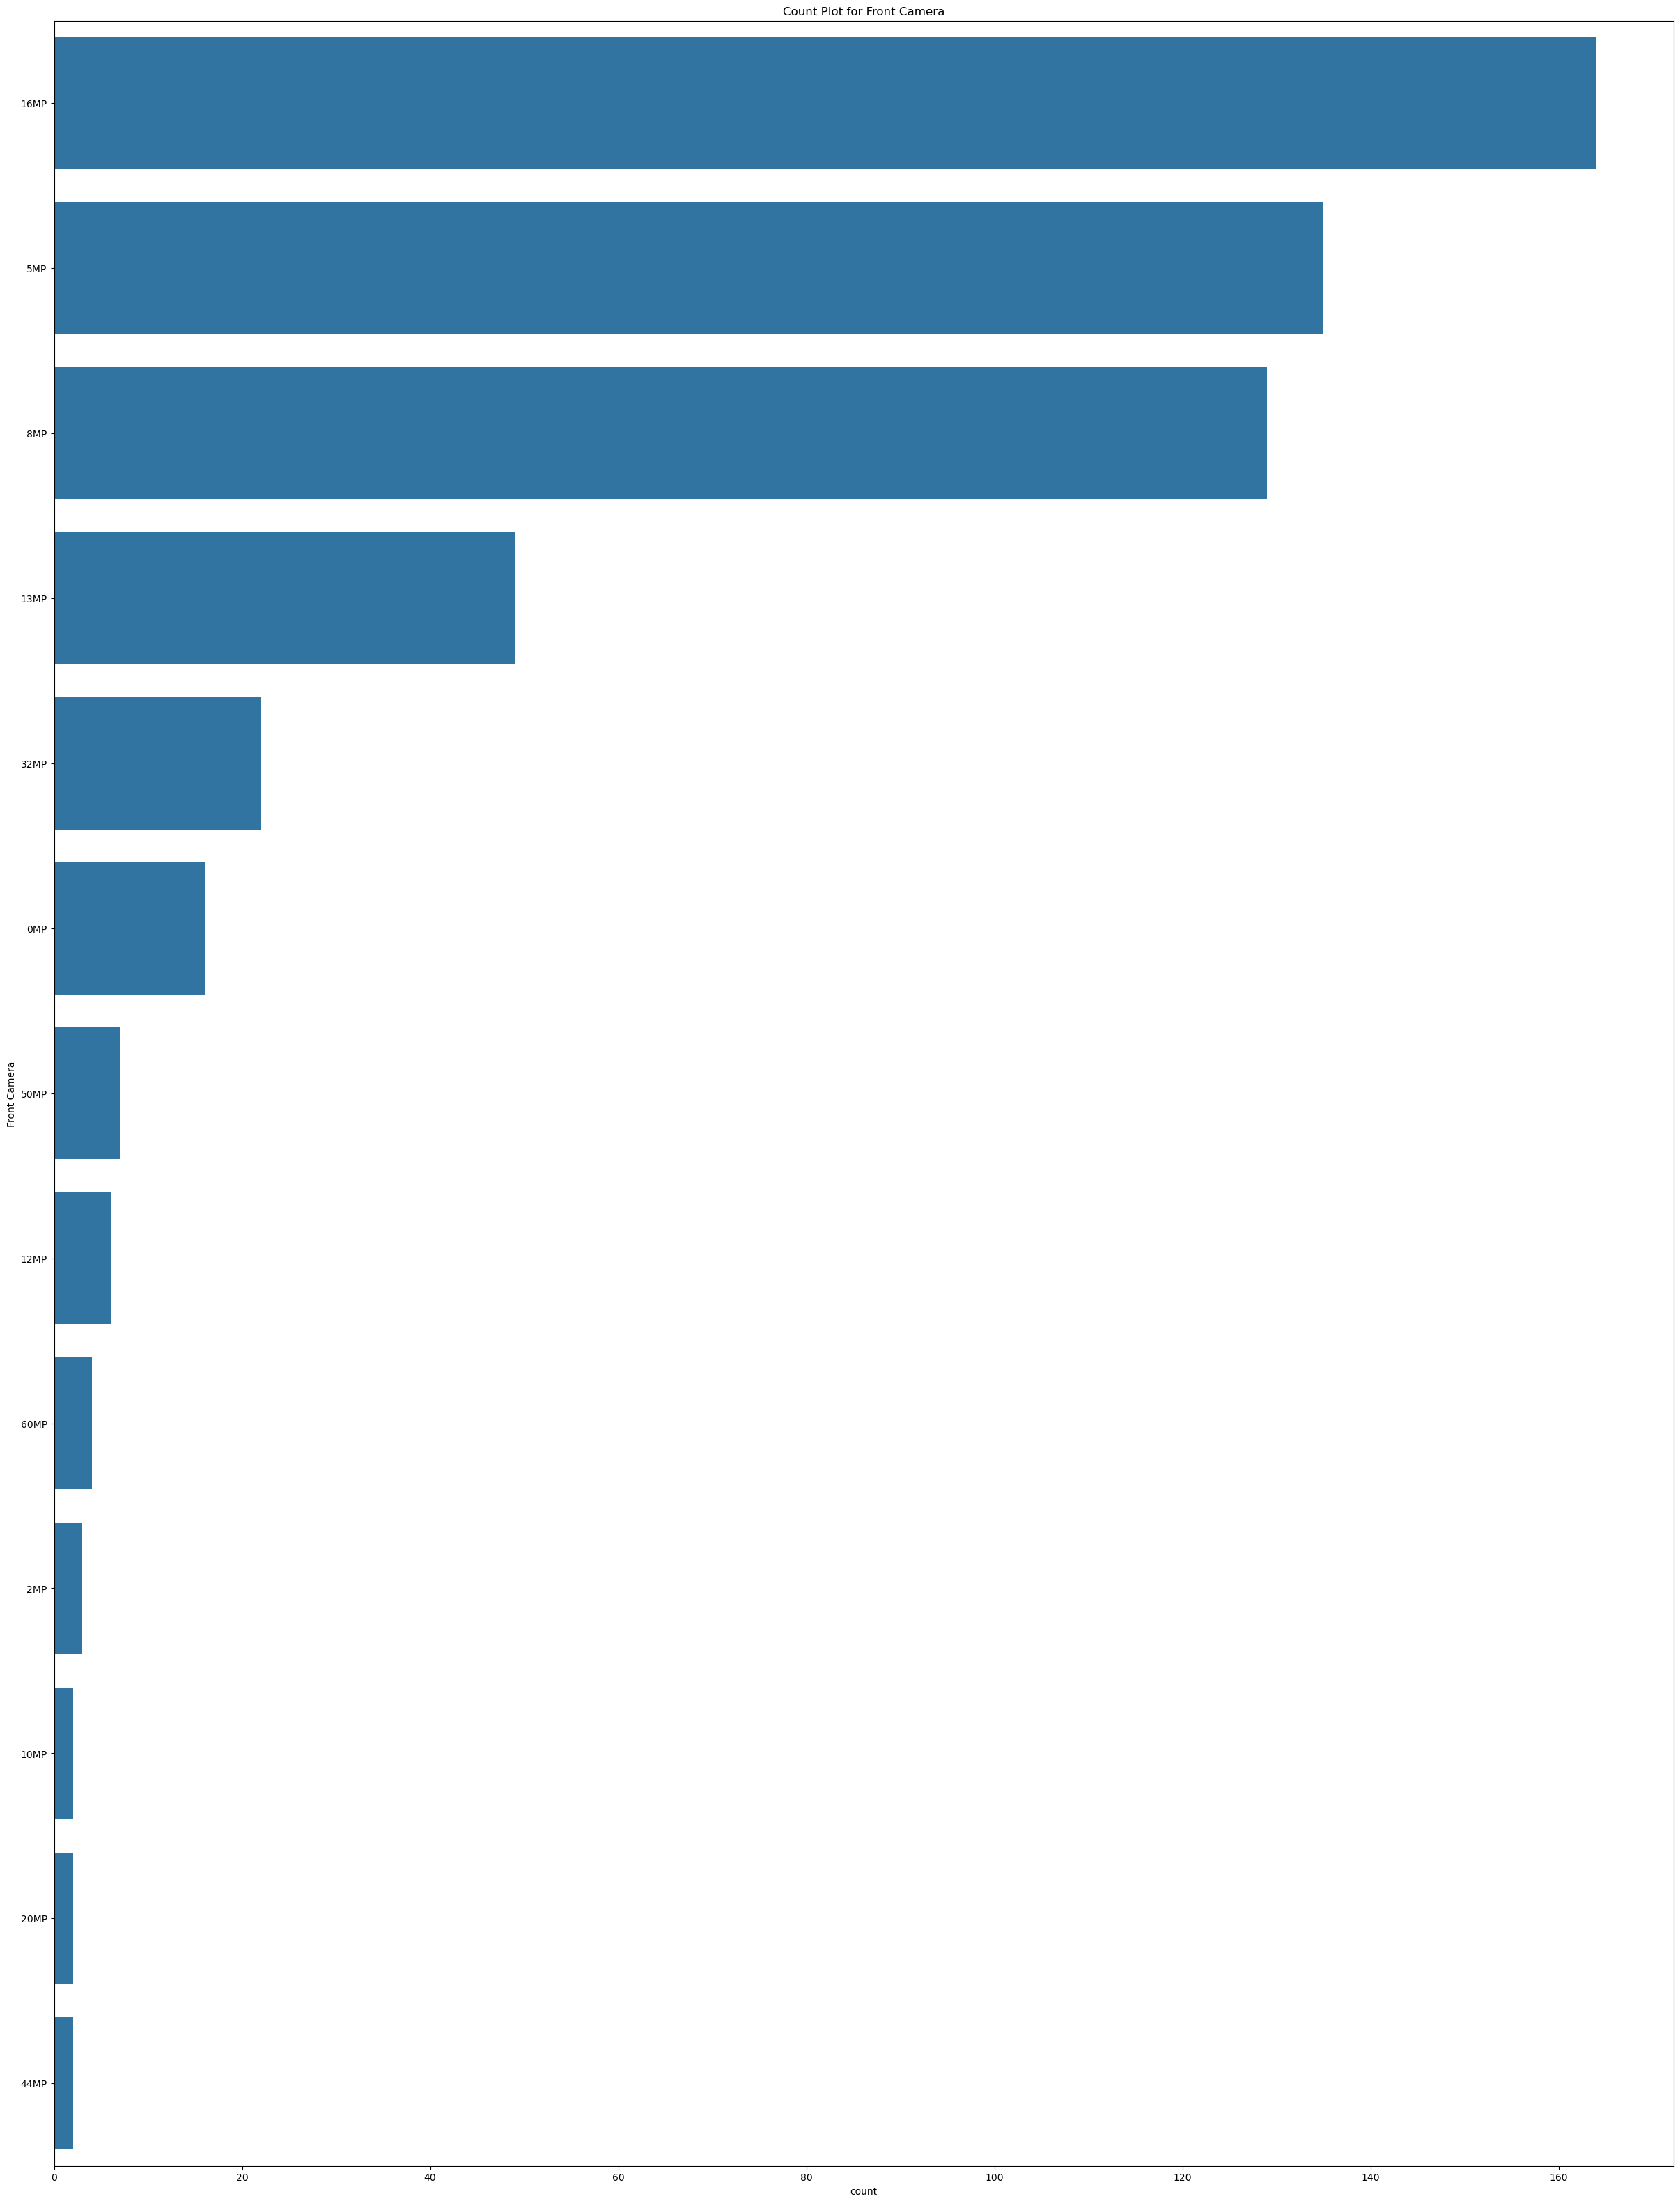

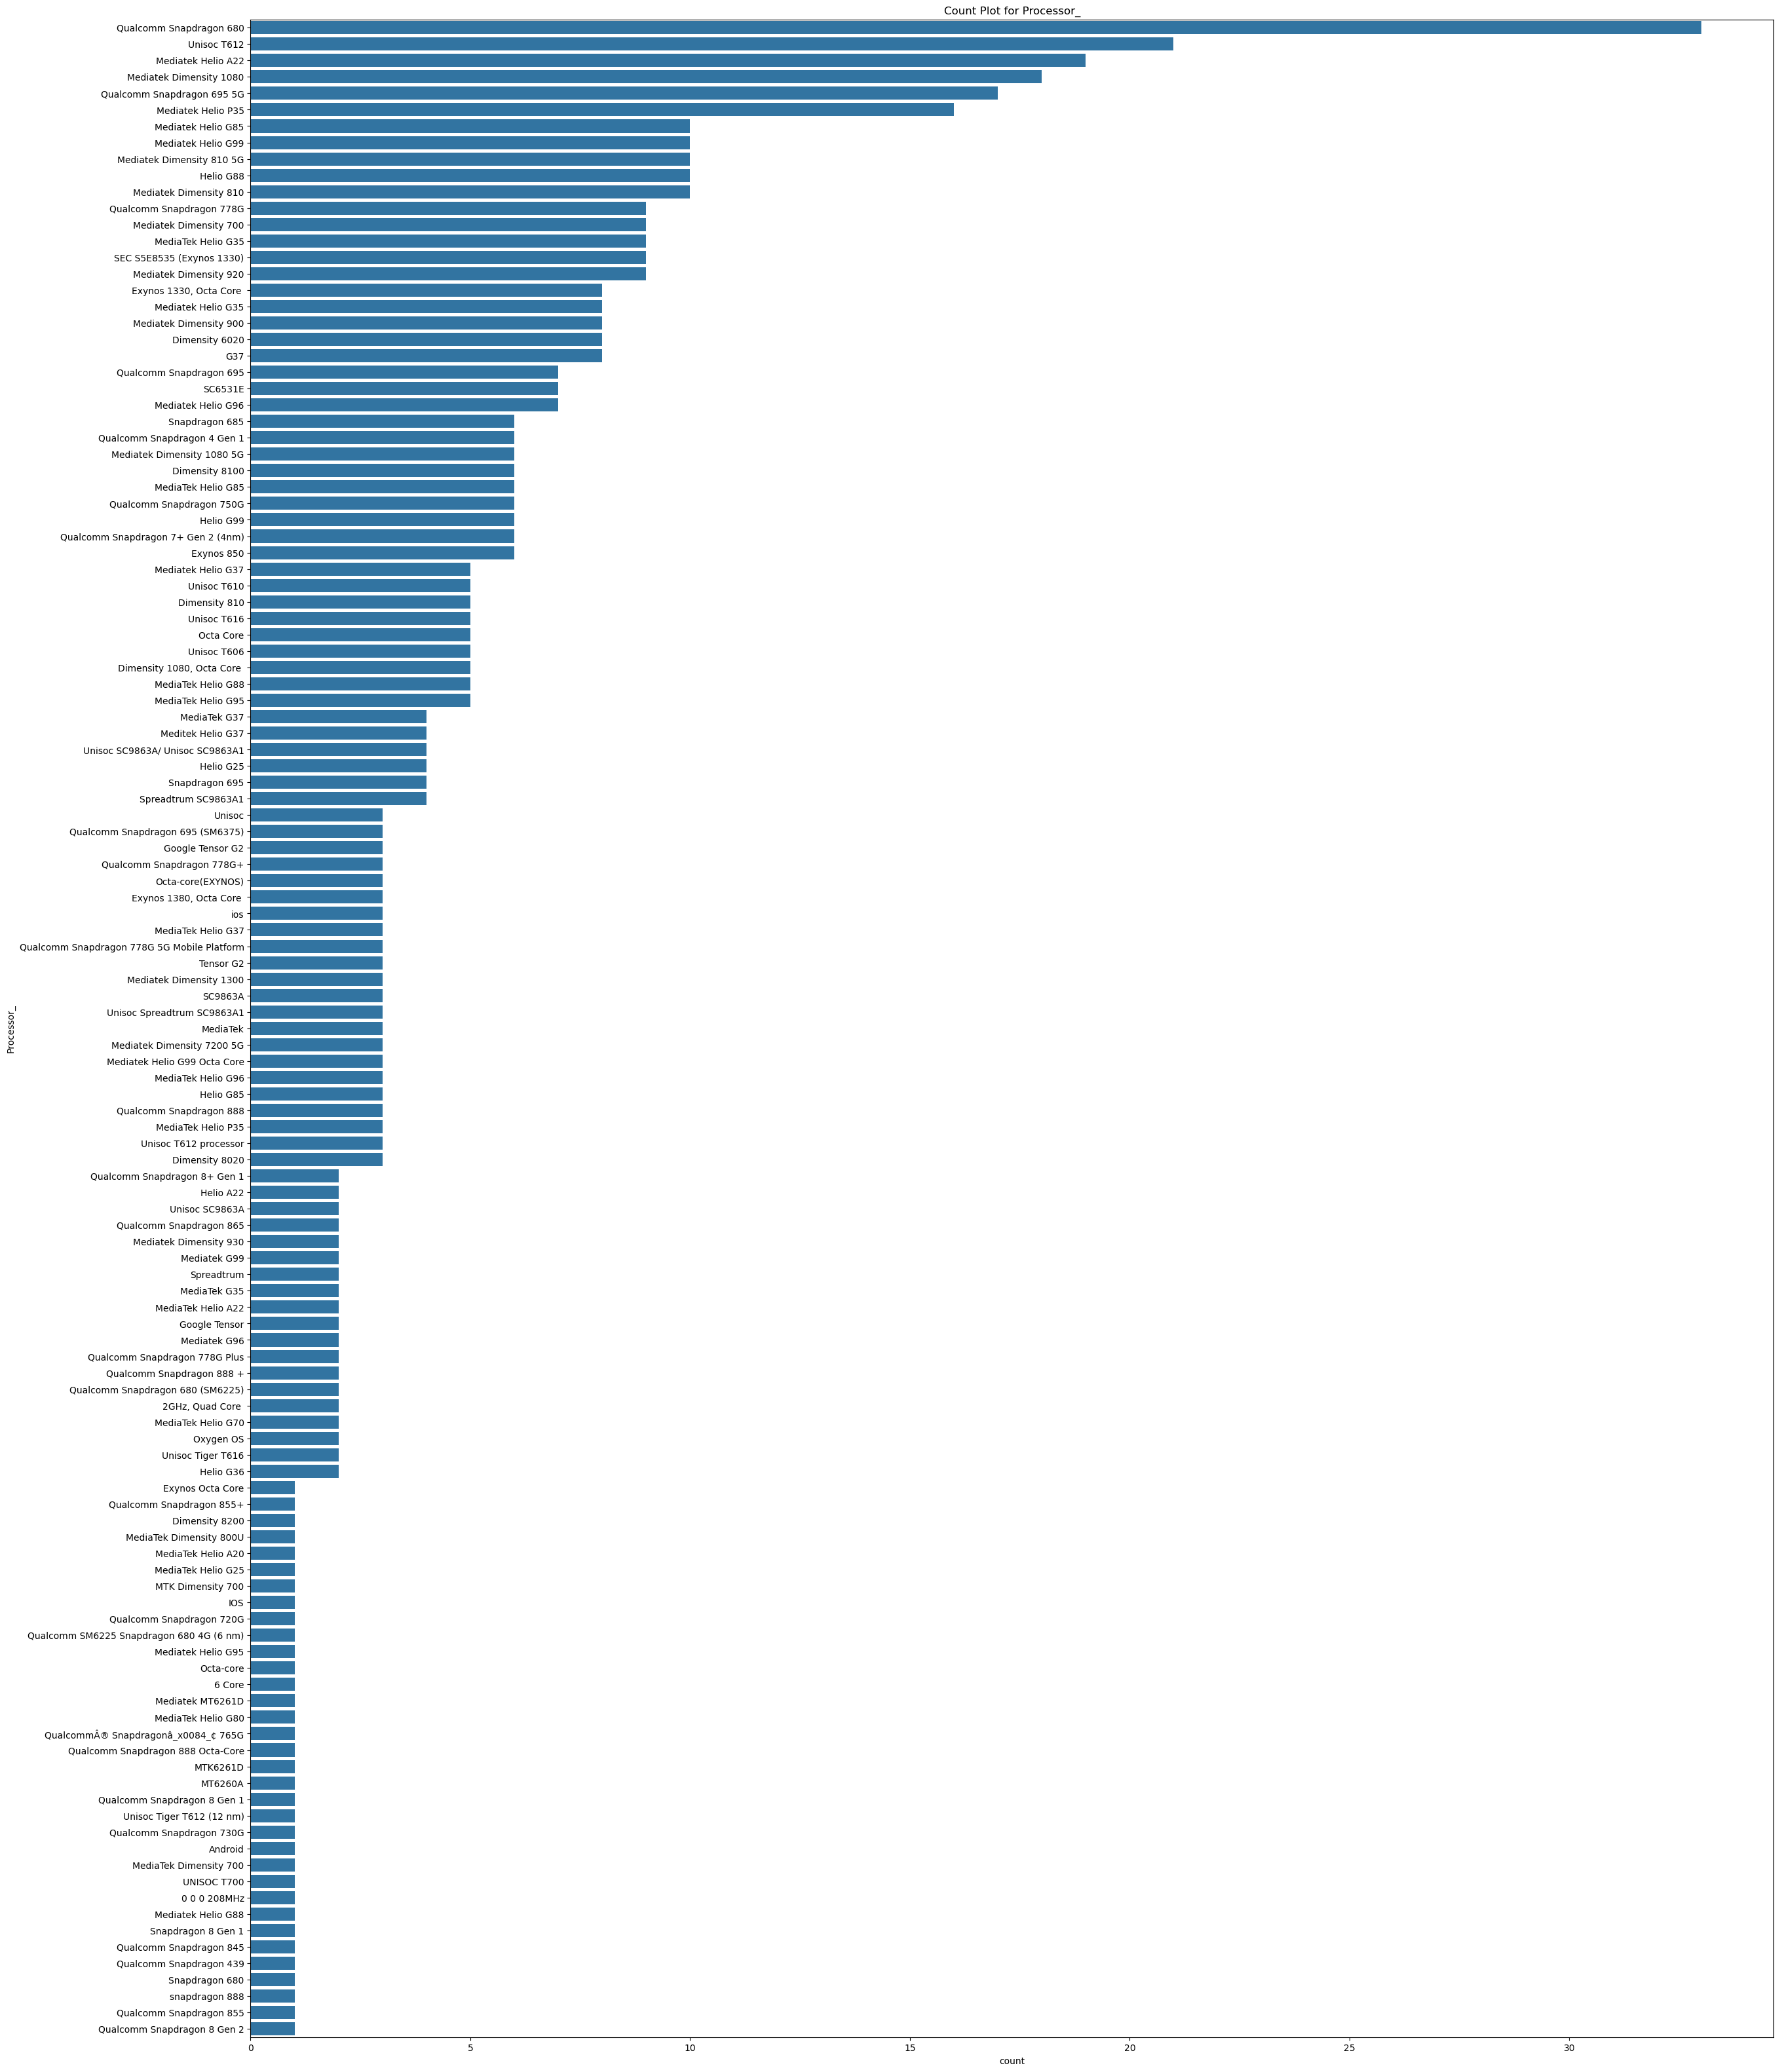

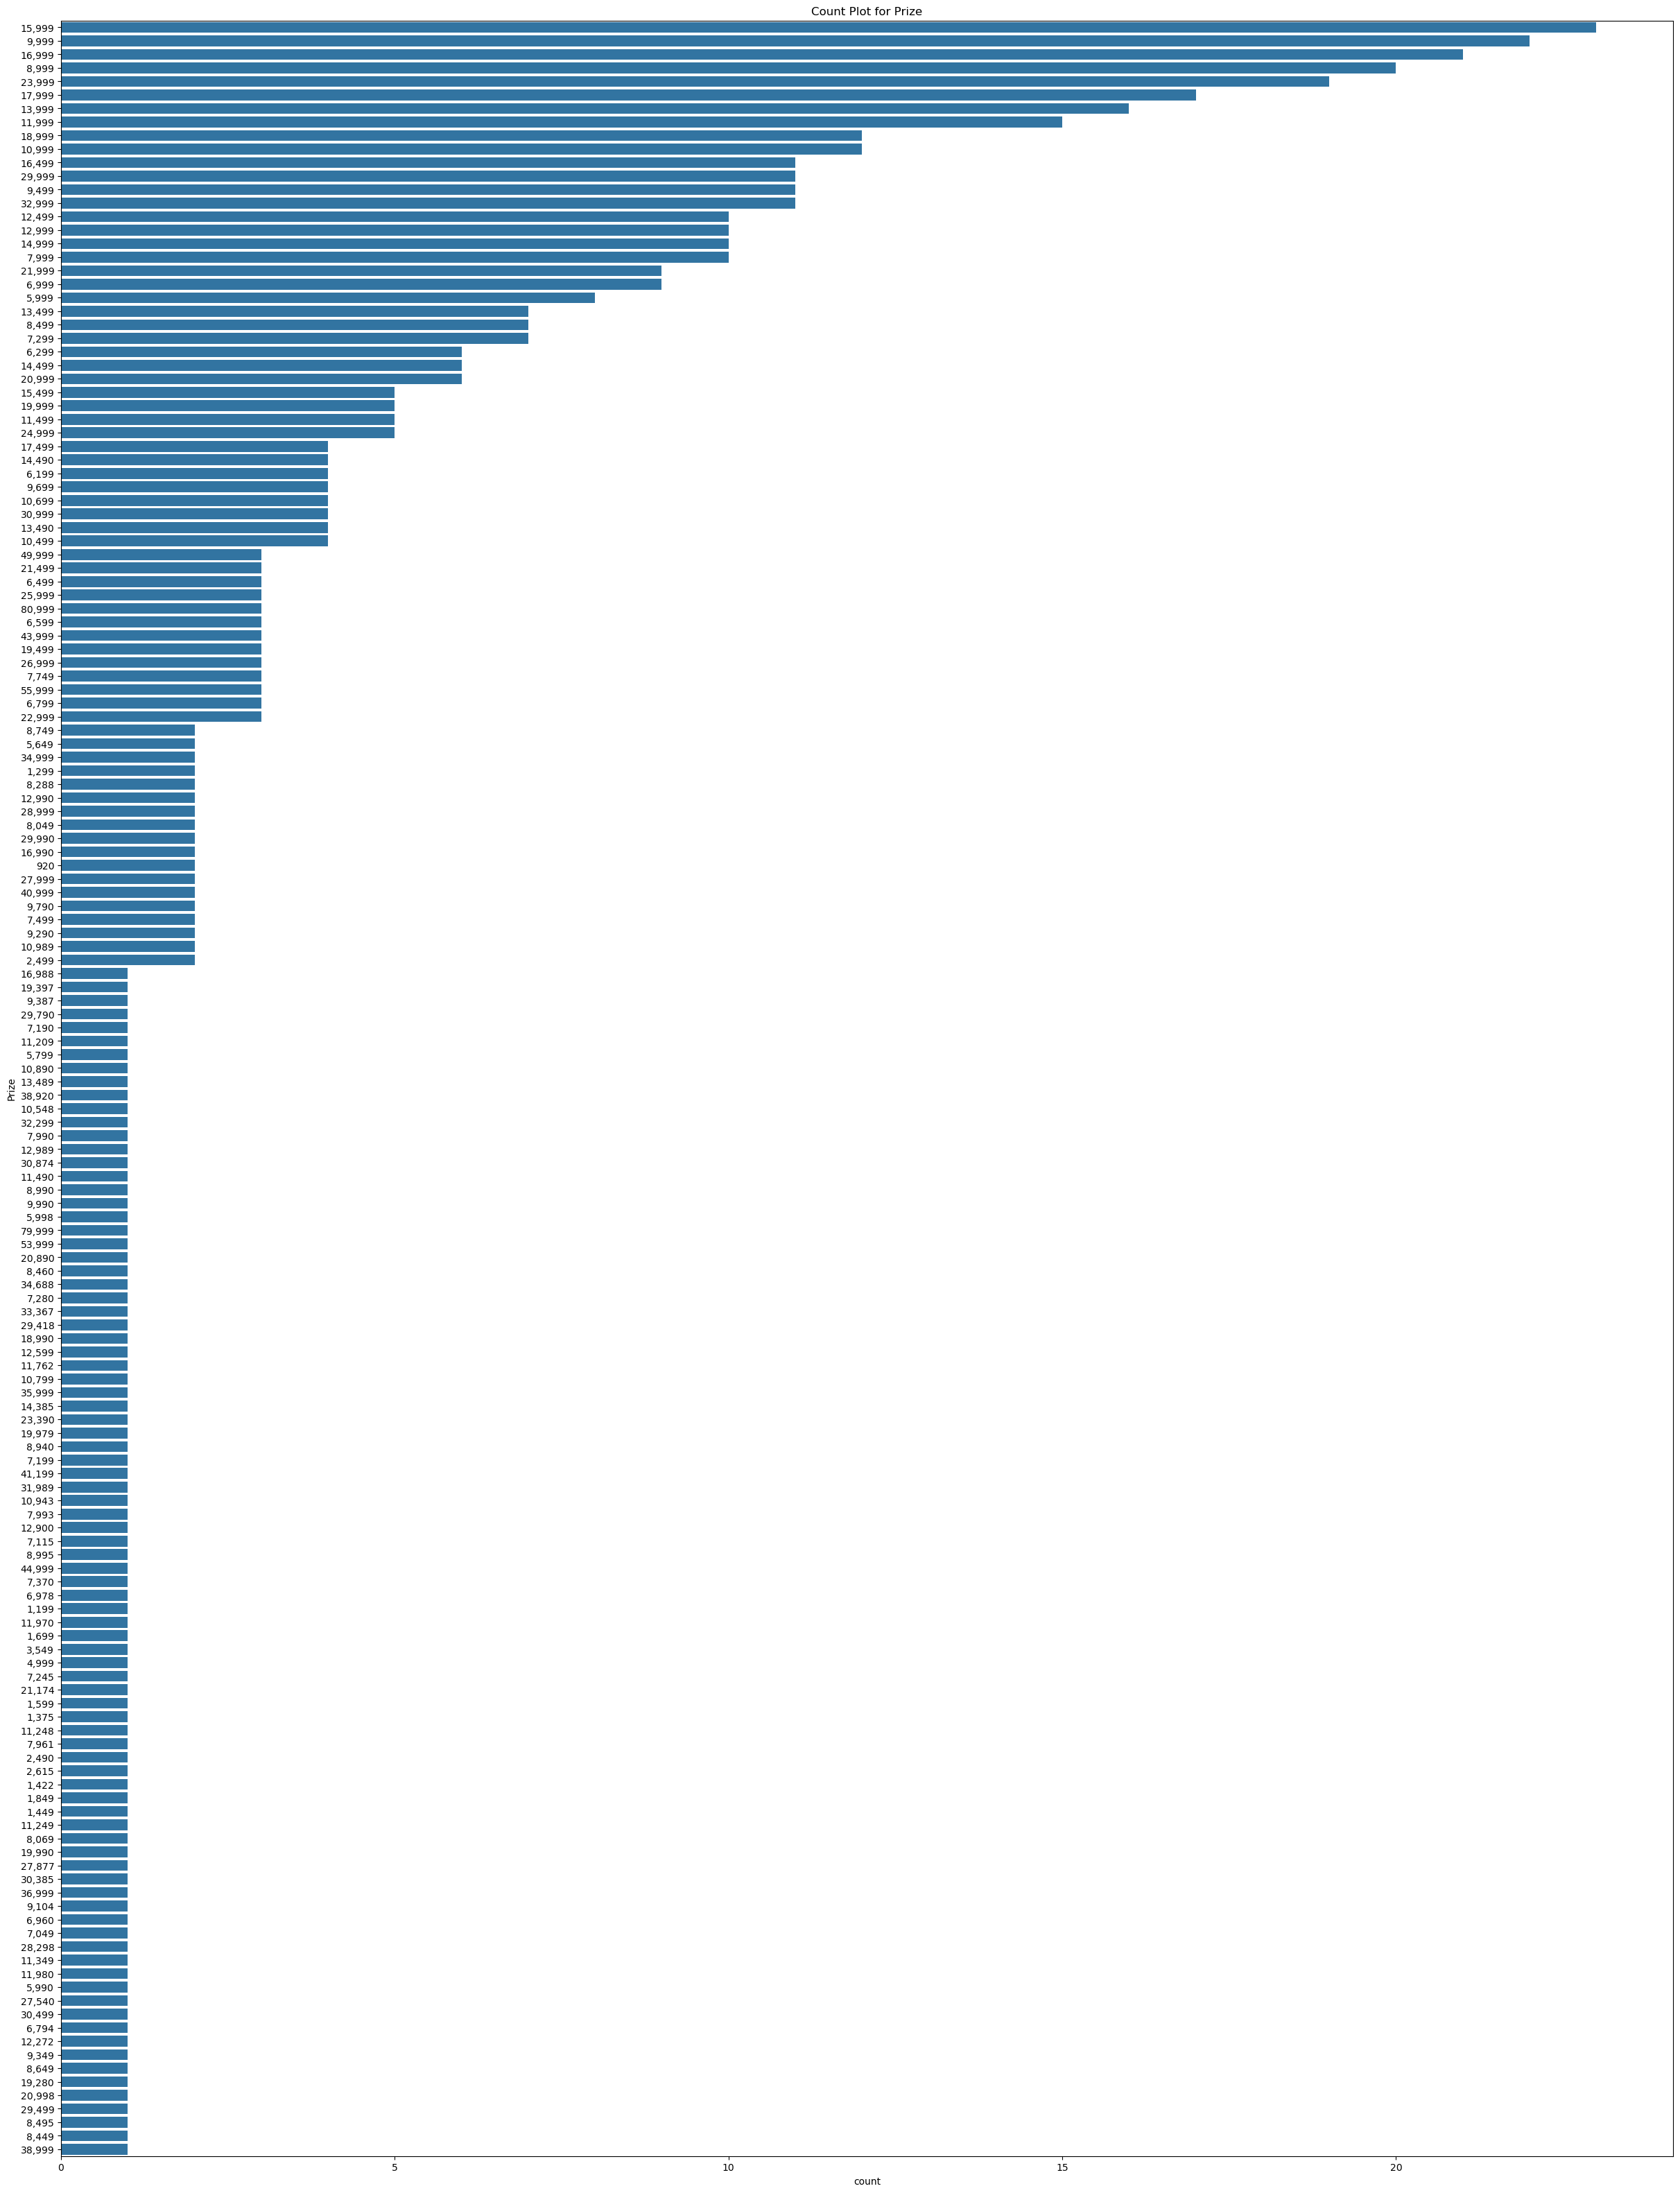

In [106]:
# 8. Countplots for Categorical Features
for col in categorical_cols:
    plt.figure(figsize=(30, 40))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Count Plot for {col}')
    plt.show()

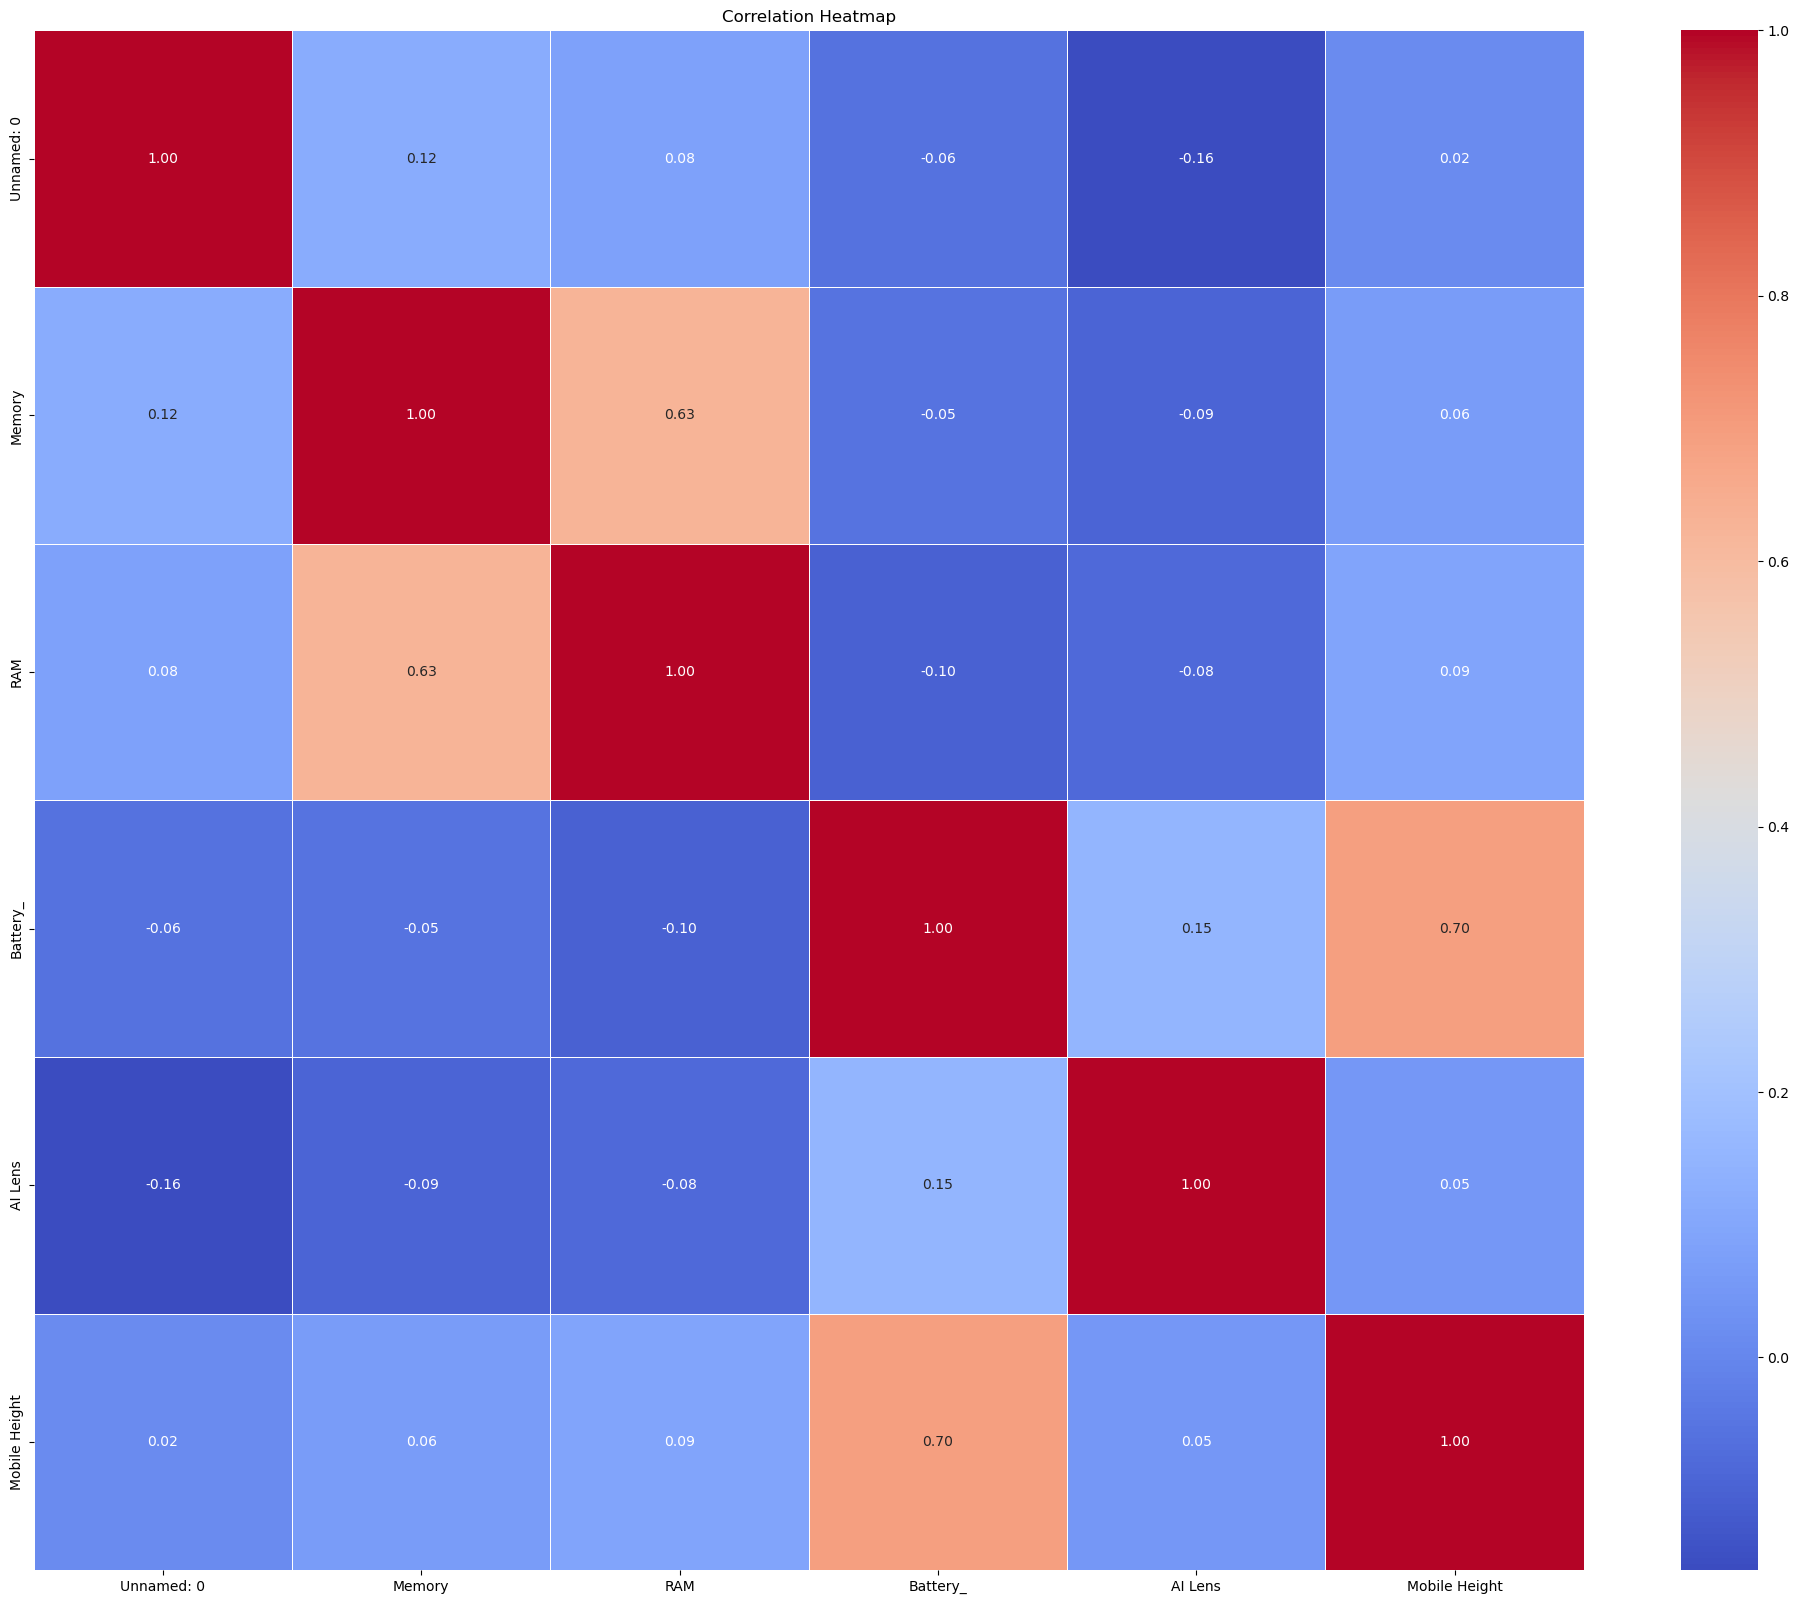

In [107]:
# 9. Correlation Heatmap (for numeric features)
plt.figure(figsize=(25, 20))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

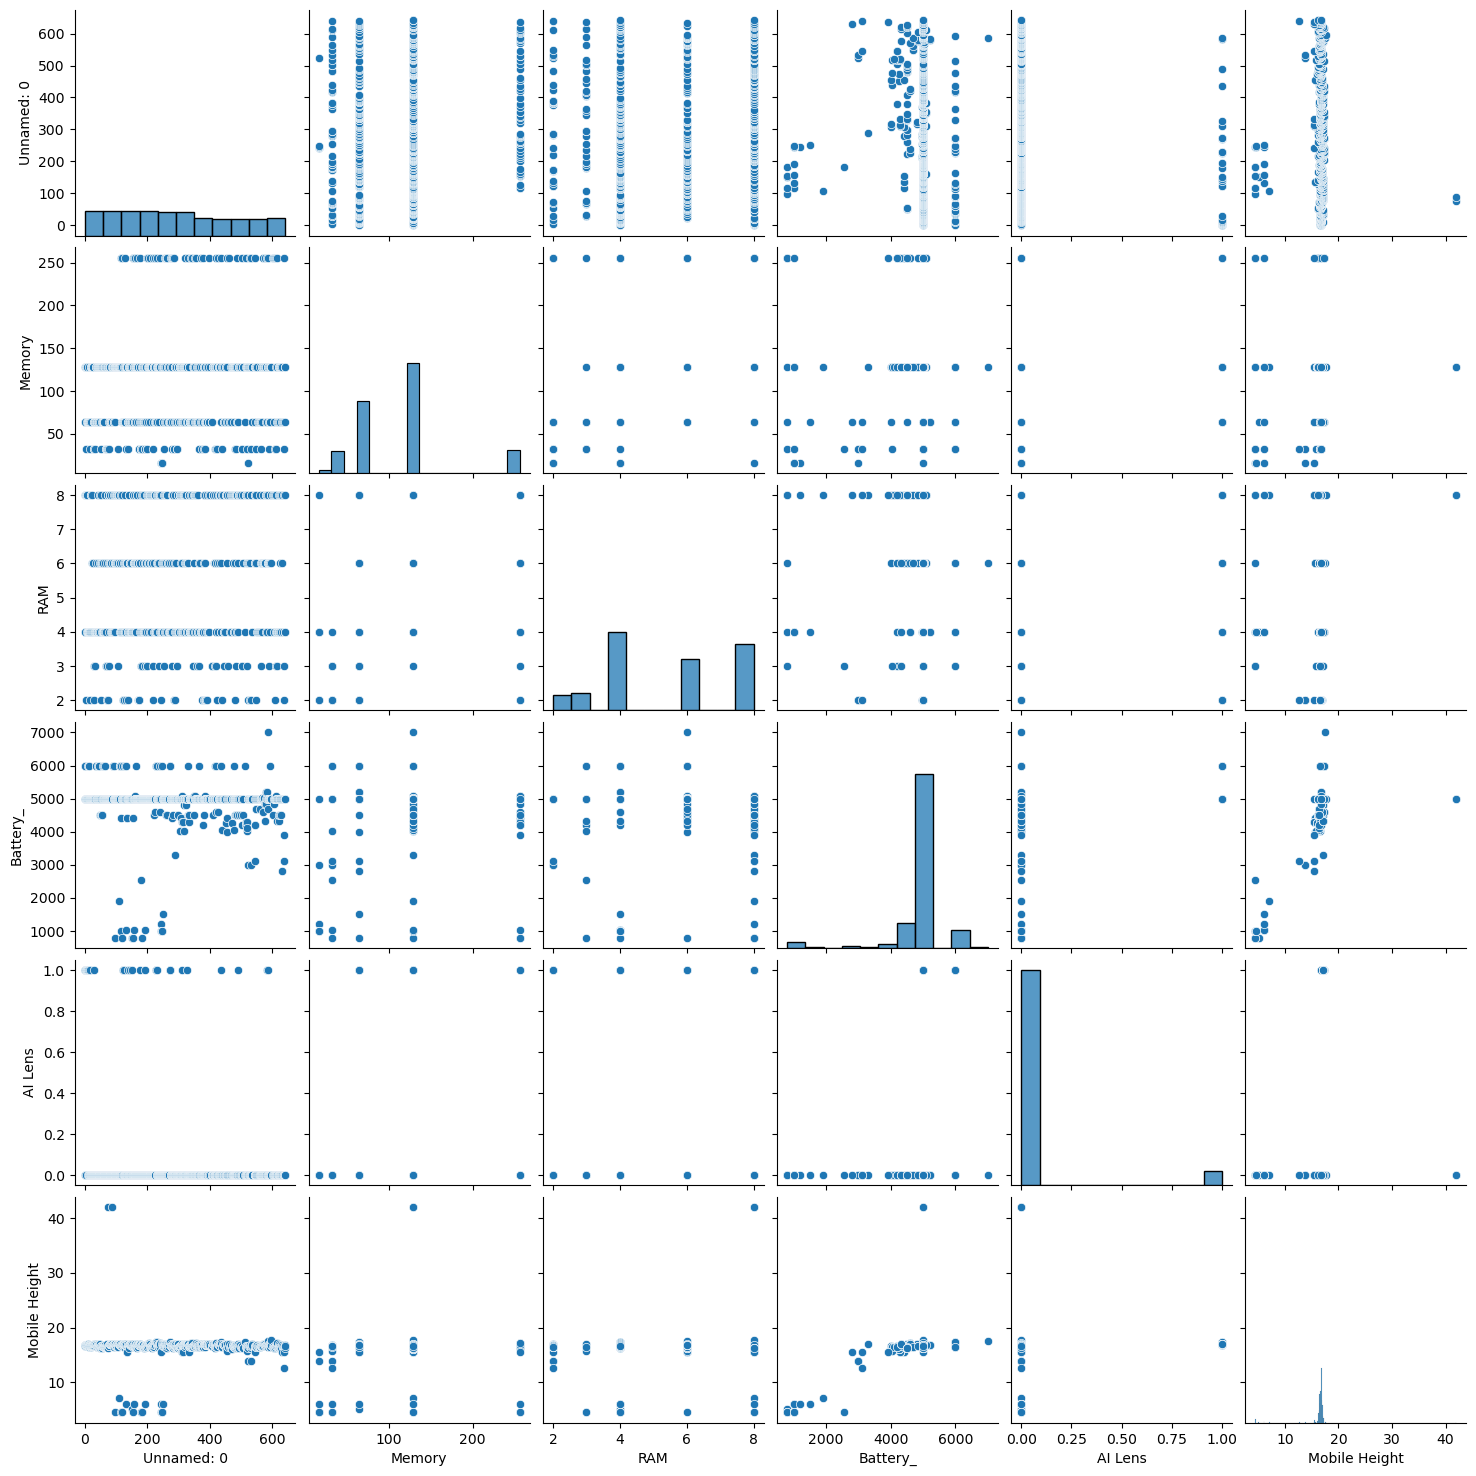

In [108]:
# 10. Pairplot (optional, use on small datasets)
sns.pairplot(df[numeric_cols])
plt.show()

# Data Preprocessing

In [110]:
### 1. Handle Missing Values ###
# Strategy: Fill numeric with median, categorical with mode
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

# Count missing values in each column
df.isnull().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [115]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [119]:
### 2. Detect & Handle Outliers ###
# Using IQR method
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Option 1: Cap outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

In [124]:
### 3. Encode Categorical Features ### one-hot encoding
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# One-Hot Encode unordered categories (drop_first=True to avoid dummy trap)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [125]:
### 4. Feature Engineering  ###
# Example: Combine camera specs
if 'rear_camera_mp' in df.columns and 'front_camera_mp' in df.columns:
    df['total_camera_mp'] = df['rear_camera_mp'] + df['front_camera_mp']

In [126]:
### 5. Scaling Numeric Features ###
# Not strictly necessary for tree models (like Random Forest), but important for linear ones
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [127]:
### 6. Final Check ###
print("\nPreprocessing Complete! Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())


Preprocessing Complete! Dataset Shape: (541, 770)
Columns: ['Unnamed: 0', 'Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height', 'Model_APPLE iPhone 12', 'Model_APPLE iPhone 14 Plus', 'Model_Google Pixel 6a', 'Model_Google Pixel 7', 'Model_Google Pixel 7a', 'Model_I Kall Z19Pro', 'Model_I Kall Z19Pro Flash blue', 'Model_IQOO Neo 7 5G', 'Model_Infinix HOT 12 Play', 'Model_Infinix HOT 20 5G', 'Model_Infinix HOT 20 Play', 'Model_Infinix HOT 30i', 'Model_Infinix Hot 11', 'Model_Infinix Hot 12', 'Model_Infinix Hot 12 Pro', 'Model_Infinix Hot 20 5G', 'Model_Infinix NOTE 12i', 'Model_Infinix Note 11s Free Fire Edition', 'Model_Infinix Note 12', 'Model_Infinix Note 12 5G', 'Model_Infinix Note 12 Pro', 'Model_Infinix Note 12 Pro 5G', 'Model_Infinix SMART 7', 'Model_Infinix Smart 5A', 'Model_Infinix Smart 6', 'Model_Infinix Smart 6 HD', 'Model_Infinix Smart 7 HD', 'Model_Infinix Zero 20', 'Model_Infinix Zero 5G 2023', 'Model_Infinix Zero 5G 2023 TURBO', 'Model_LAVA Z2', 'Model_LAVA Z21', 'Mod

In [128]:
# Drop the unwanted column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Feature Extraction

### Correlation Matrix (Heatmap)

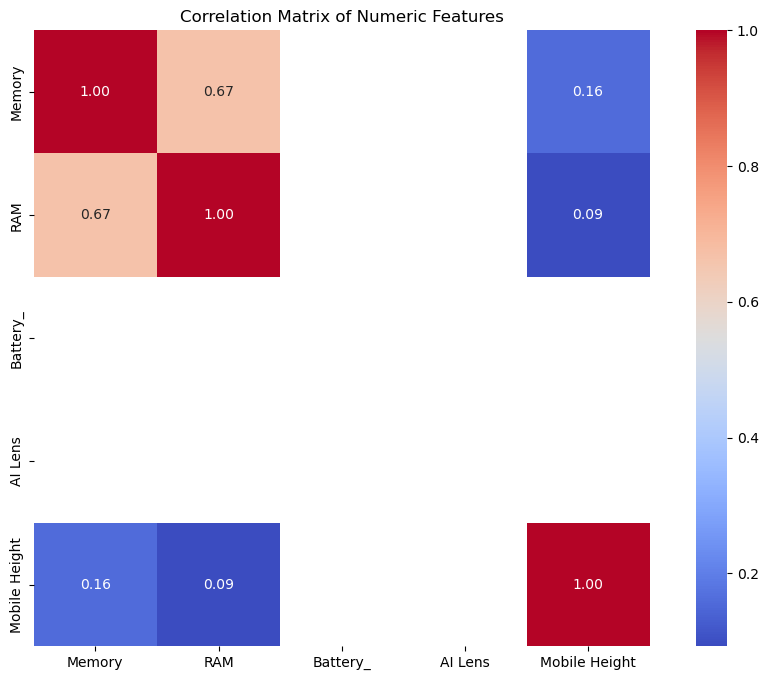

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns

# Only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

### Analyze Engineered Feature: total_camera_mp

In [147]:
# Extract rear and front camera one-hot columns
rear_cam_cols = [col for col in df.columns if col.startswith('Rear Camera_')]
front_cam_cols = [col for col in df.columns if col.startswith('Front Camera_')]

print("Rear Camera Columns:", rear_cam_cols)
print("Front Camera Columns:", front_cam_cols)

Rear Camera Columns: ['Rear Camera_108MP', 'Rear Camera_12MP', 'Rear Camera_13MP', 'Rear Camera_16MP', 'Rear Camera_200MP', 'Rear Camera_2MP', 'Rear Camera_32MP', 'Rear Camera_40MP', 'Rear Camera_48MP', 'Rear Camera_50MP', 'Rear Camera_5MP', 'Rear Camera_64MP', 'Rear Camera_8MP']
Front Camera Columns: ['Front Camera_10MP', 'Front Camera_12MP', 'Front Camera_13MP', 'Front Camera_16MP', 'Front Camera_20MP', 'Front Camera_2MP', 'Front Camera_32MP', 'Front Camera_44MP', 'Front Camera_50MP', 'Front Camera_5MP', 'Front Camera_60MP', 'Front Camera_8MP']


In [149]:
# Parse the megapixel values
rear_mp_values = [int(col.split('_')[1].replace('MP', '')) for col in rear_cam_cols]
front_mp_values = [int(col.split('_')[1].replace('MP', '')) for col in front_cam_cols]

# Calculate total camera megapixels
df['total_camera_mp'] = df[rear_cam_cols].values @ np.array(rear_mp_values) + df[front_cam_cols].values @ np.array(front_mp_values)
print(df['total_camera_mp'])

0      18
1      18
2      66
3      13
4      55
       ..
536    62
537     7
538    58
539    82
540    58
Name: total_camera_mp, Length: 541, dtype: int32


### Train Test Split

In [192]:
# List columns that start with 'Prize_'
price_columns = [col for col in df.columns if col.startswith('Prize_')]
print(price_columns)

# Check unique values or sample from those columns
print(df[price_columns].head())

# If there is a single correct 'Prize_...' column to use as target:
target_col = 'Prize_1,299'  # example, choose the right one

# Use this for modeling
y = df[target_col]

# Drop this column from features if needed
X = df.drop(target_col, axis=1)


['Prize_1,299', 'Prize_1,375', 'Prize_1,422', 'Prize_1,449', 'Prize_1,599', 'Prize_1,699', 'Prize_1,849', 'Prize_10,499', 'Prize_10,548', 'Prize_10,699', 'Prize_10,799', 'Prize_10,890', 'Prize_10,943', 'Prize_10,989', 'Prize_10,999', 'Prize_11,209', 'Prize_11,248', 'Prize_11,249', 'Prize_11,349', 'Prize_11,490', 'Prize_11,499', 'Prize_11,762', 'Prize_11,970', 'Prize_11,980', 'Prize_11,999', 'Prize_12,272', 'Prize_12,499', 'Prize_12,599', 'Prize_12,900', 'Prize_12,989', 'Prize_12,990', 'Prize_12,999', 'Prize_13,489', 'Prize_13,490', 'Prize_13,499', 'Prize_13,999', 'Prize_14,385', 'Prize_14,490', 'Prize_14,499', 'Prize_14,999', 'Prize_15,499', 'Prize_15,999', 'Prize_16,499', 'Prize_16,988', 'Prize_16,990', 'Prize_16,999', 'Prize_17,499', 'Prize_17,999', 'Prize_18,990', 'Prize_18,999', 'Prize_19,280', 'Prize_19,397', 'Prize_19,499', 'Prize_19,979', 'Prize_19,990', 'Prize_19,999', 'Prize_2,490', 'Prize_2,499', 'Prize_2,615', 'Prize_20,890', 'Prize_20,998', 'Prize_20,999', 'Prize_21,174', '

In [200]:
print(df.columns)

Index(['Memory', 'RAM', 'Battery_', 'AI Lens', 'Mobile Height',
       'Model_APPLE iPhone 12', 'Model_APPLE iPhone 14 Plus',
       'Model_Google Pixel 6a', 'Model_Google Pixel 7',
       'Model_Google Pixel 7a',
       ...
       'Prize_9,290', 'Prize_9,349', 'Prize_9,387', 'Prize_9,499',
       'Prize_9,699', 'Prize_9,790', 'Prize_9,990', 'Prize_9,999', 'Prize_920',
       'total_camera_mp'],
      dtype='object', length=770)


In [214]:
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = df.drop('Prize', axis=1)
y = df['Prize']

# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train-Test Split Complete")
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

KeyError: "['Prize'] not found in axis"

### Train Multiple Models

In [ ]:
print(f"Number of NaNs in y_train: {y_train.isna().sum()}")


In [155]:
mask = y_train.notna()  # True for non-NaN values
X_train_clean = X_train.loc[mask]
y_train_clean = y_train.loc[mask]

print(f"Shape of X_train_clean: {X_train_clean.shape}")
print(f"Shape of y_train_clean: {y_train_clean.shape}")


NameError: name 'y_train' is not defined

In [204]:
# Identify the correct column (likely one-hot encoded)
price_cols = [col for col in df.columns if 'Prize_' in col]
print(price_cols)


['Prize_1,299', 'Prize_1,375', 'Prize_1,422', 'Prize_1,449', 'Prize_1,599', 'Prize_1,699', 'Prize_1,849', 'Prize_10,499', 'Prize_10,548', 'Prize_10,699', 'Prize_10,799', 'Prize_10,890', 'Prize_10,943', 'Prize_10,989', 'Prize_10,999', 'Prize_11,209', 'Prize_11,248', 'Prize_11,249', 'Prize_11,349', 'Prize_11,490', 'Prize_11,499', 'Prize_11,762', 'Prize_11,970', 'Prize_11,980', 'Prize_11,999', 'Prize_12,272', 'Prize_12,499', 'Prize_12,599', 'Prize_12,900', 'Prize_12,989', 'Prize_12,990', 'Prize_12,999', 'Prize_13,489', 'Prize_13,490', 'Prize_13,499', 'Prize_13,999', 'Prize_14,385', 'Prize_14,490', 'Prize_14,499', 'Prize_14,999', 'Prize_15,499', 'Prize_15,999', 'Prize_16,499', 'Prize_16,988', 'Prize_16,990', 'Prize_16,999', 'Prize_17,499', 'Prize_17,999', 'Prize_18,990', 'Prize_18,999', 'Prize_19,280', 'Prize_19,397', 'Prize_19,499', 'Prize_19,979', 'Prize_19,990', 'Prize_19,999', 'Prize_2,490', 'Prize_2,499', 'Prize_2,615', 'Prize_20,890', 'Prize_20,998', 'Prize_20,999', 'Prize_21,174', '

In [206]:
from sklearn.model_selection import train_test_split

# X = features, y = target variable (price)
X = df.drop('Prize', axis=1)
y = df['Prize']

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


KeyError: "['Prize'] not found in axis"

## Evaluate Models & Residual Analysis

In [158]:
# 1. Load Preprocessed Data
# Assume df is already preprocessed and available
# Make sure 'price' is your target column
X = df.drop('price', axis=1)
y = df['price']

# 2. Select Top Features using Random Forest
rf_temp = RandomForestRegressor(n_estimators=100, random_state=42)
rf_temp.fit(X, y)

# Get top 10 features
importances = rf_temp.feature_importances_
feature_ranks = pd.Series(importances, index=X.columns).sort_values(ascending=False)
top_features = feature_ranks.head(10).index.tolist()
X_selected = X[top_features]

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 4. Train Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append([name, mae, rmse, r2])
    print(f"{name}:\n MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}\n")

# 5. Show Results Summary
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R² Score"])
print("Model Comparison:\n", results_df.sort_values(by="RMSE"))

# 6. Visualize Predictions (Random Forest as example)
best_model = models["Random Forest"]
y_pred = best_model.predict(X_test)

KeyError: "['price'] not found in axis"

In [160]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Define evaluation function
def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    print(f"Model: {type(model).__name__}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("-" * 30)

# 1. Train models on selected features
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

trained_models = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    trained_models[name] = model

# 2. Evaluate trained models
for name, model in trained_models.items():
    evaluate(model, X_test, y_test)


NameError: name 'X_train' is not defined

In [217]:
print(trained_models.keys())

dict_keys([])


In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the properly trained model on top 10 features
best_model = trained_models["Random Forest"]
y_pred = best_model.predict(X_test)

plt.figure(figsize=(14, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ideal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.tight_layout()
plt.show()


KeyError: 'Random Forest'

In [163]:
# Residual Plot
residuals = y_test - y_pred

plt.figure(figsize=(14, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.show()

# Residuals vs predicted
plt.figure(figsize=(14, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.tight_layout()
plt.show()

NameError: name 'y_test' is not defined

In [165]:
# Metrics Summary Table
results = []

models = [trained_models["Linear Regression"],
          trained_models["Decision Tree"],
          trained_models["Random Forest"],
          trained_models["Gradient Boosting"]]

names = ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]

for model, name in zip(models, names):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results.append([name, mae, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R² Score"])
print(results_df.sort_values(by="RMSE"))


KeyError: 'Linear Regression'

# Feature Importance Analysis

### Extract Feature Importances from Model

In [168]:
top_features = feature_importance_df['Feature'].head(10).tolist()
X_selected = X[top_features]

NameError: name 'feature_importance_df' is not defined

In [170]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]  # feature names

X_selected = X[selected_features]

NameError: name 'X' is not defined

In [172]:
# Extract Feature Importances from Model

# Re-train on selected features
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_selected, y)

# Feature importance
importances = rf_model.feature_importances_
features = X_selected.columns

# Create DataFrame for display
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top features
print("Feature Importances from Random Forest:")
print(feature_importance_df)

NameError: name 'X_selected' is not defined

In [208]:
# Visualize Feature Importances

plt.figure(figsize=(14, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title("Top 10 Most Important Features for Price Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

NameError: name 'feature_importance_df' is not defined

<Figure size 1400x600 with 0 Axes>